# <font color = blue> EDA Case Study </font>

<div class="alert alert-block alert-info">
<h1><b> Importing the required libraries</b></h1>
</div>

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

# APPLICATION DATA

<div class="alert alert-block alert-info">
<h1><b> Loading Dataset</b></h1>
</div>


In [3]:
# loading Application data
pd.set_option("display.max_columns",200)
Appl_data = pd.read_csv("application_data.csv")
Appl_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

<div class="alert alert-block alert-info">
<h1><b> Dataframe Inspection</b></h1>
</div>

In [4]:
# Shape of application data
Appl_data.shape

(307511, 122)

In [5]:
# Info of application data
Appl_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
# Summary of numerical columns for application data
Appl_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
# Null value percantage in application data
pd.set_option("display.max_rows",200)
Appl_data.isnull().sum()*100/Appl_data.shape[0]

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

<div class="alert alert-block alert-info">
<h1><b> Data Cleaning</b></h1>
</div>

## Remove columns with missing values more than 40%

In [8]:
# Drop columns with missing values more than 40% and check shape
Appl_data.drop(Appl_data.columns[Appl_data.isnull().sum()*100/Appl_data.shape[0]>40],inplace=True,axis=1)
Appl_data.shape

(307511, 73)

In [9]:
# checking of null value percentage after dropping columns
Appl_data.isnull().sum()*100/Appl_data.shape[0]

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

## Converting negative values for days to absolute value and coverting number of "days" to "years".

In [10]:
# Storing list of days columns in the "Days"

Days= [i for i in Appl_data if "DAYS" in i]
Days

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [11]:
# Converting days in absolute value
Appl_data[Days] = abs(Appl_data[Days])

In [12]:
# Converting days into years by dividing it with 365 for better analysis.

Appl_data[Days]=Appl_data[Days]/365
Appl_data[Days]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        25.920548       1.745205           9.994521         5.808219   
1        45.931507       3.254795           3.249315         0.797260   
2        52.180822       0.616438          11.671233         6.934247   
3        52.068493       8.326027          26.939726         6.676712   
4        54.608219       8.323288          11.810959         9.473973   
...            ...            ...                ...              ...   
307506   25.553425       0.646575          23.167123         5.430137   
307507   56.917808    1000.665753          12.021918        11.205479   
307508   41.002740      21.701370          18.457534        14.109589   
307509   32.769863      13.112329           7.019178         2.550685   
307510   46.180822       3.457534          14.049315         1.123288   

        DAYS_LAST_PHONE_CHANGE  
0                     3.106849  
1                     2.268493  
2                     2.232877  
3                     1.690411  
4                     3.030137  
...                        ...  
307506                0.747945  
307507                0.000000  
307508                5.230137  
307509                0.882192  
307510                2.156164  

[307511 rows x 5 columns]

In [13]:
# Summary of days columns(in years)
Appl_data[Days].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean       43.936973     185.547239          13.660604         8.203294   
std        11.956133     382.037676           9.651743         4.135481   
min        20.517808       0.000000           0.000000         0.000000   
25%        34.008219       2.556164           5.506849         4.712329   
50%        43.150685       6.079452          12.339726         8.915068   
75%        53.923288      15.635616          20.491781        11.778082   
max        69.120548    1000.665753          67.594521        19.717808   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean                 2.637969  
std                  2.265229  
min                  0.000000  
25%                  0.750685  
50%                  2.073973  
75%                  4.301370  
max                 11.758904

## Imputing null values and change the datatype in correct format

In [14]:
Appl_data.isnull().sum()*100/Appl_data.shape[0]

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

## <font color = blue> Inferences for null values imputation</font>

- **AMT_ANNUITY --------------------------------- 0.003902 % :** *Impute the missing values with the median based on the skewness of the numerical variable*
- **AMT_GOODS_PRICE ------------------------- 0.090403 % :** *Impute the missing values with the median based on the skewness of the numerical variable*
- **NAME_TYPE_SUITE -------------------------- 0.420148 % :** *Impute the missing values with the mode since it is categorical variable*
- **CNT_FAM_MEMBERS ------------------------ 0.000650 % :** *Impute the missing values with the median based on the skewness of the numerical variable*
- **DAYS_LAST_PHONE_CHANGE ----------- 0.000325 % :** *Impute the missing values with the median based on the skewness of the numerical variable*
- **AMT_REQ_CREDIT_BUREAU_HOUR --13.501631 % :** *Impute the missing values with the mode since it is categorical variable*
- **AMT_REQ_CREDIT_BUREAU_DAY  ---- 13.501631 % :** *Impute the missing values with the mode since it is categorical variable*
- **AMT_REQ_CREDIT_BUREAU_WEEK - 13.501631 % :** *Impute the missing values with the mode since it is categorical variable* 
- **AMT_REQ_CREDIT_BUREAU_MON  --- 13.501631 % :** *Impute the missing values with the mode since it is categorical variable*
- **AMT_REQ_CREDIT_BUREAU_QRT  ---- 13.501631 % :** *Impute the missing values with the mode since it is categorical variable*
- **AMT_REQ_CREDIT_BUREAU_YEAR -- 13.501631 % :** *Impute the missing values with the mode since it is categorical variable*
- **NOTE - All the distributions for above variables are derived and shown in graph below.**

In [15]:
# Checking application data for data type of columns
Appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [16]:
# Value counts for Gender
Appl_data["CODE_GENDER"].value_counts(normalize=True)*100

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [17]:
# We can replace "XNA" with mode in CODE_GENDER, which means not available for the column.

Appl_data["CODE_GENDER"]=Appl_data["CODE_GENDER"].replace("XNA",Appl_data["CODE_GENDER"].mode()[0])
Appl_data["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [18]:
# We can't impute "XNA" value as these are 18% which is very high

Appl_data.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

In [19]:
# value_counts of Occupation Type
Appl_data.OCCUPATION_TYPE.value_counts(normalize=True,dropna=False)*100

NaN                      31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [20]:
# As there is more than 30% null values(even greater than mode value), we can not impute it with mode. So, we impute with "others" category
Appl_data.OCCUPATION_TYPE.fillna("Others",inplace=True)
Appl_data.OCCUPATION_TYPE.value_counts(normalize=True,dropna=False)*100

Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [21]:
# Converting AMT_CREDIT_BUREAU from float to integer.

CREDIT_BUREAU = [i for i in Appl_data if "CREDIT_BUREAU" in i]

for i in CREDIT_BUREAU:
    Appl_data[i].fillna(Appl_data[i].mode()[0],inplace=True)
    Appl_data[i]=Appl_data[i].astype("int")
 

In [22]:
Appl_data["CNT_FAM_MEMBERS"].fillna(Appl_data["CNT_FAM_MEMBERS"].mode()[0],inplace=True)
Appl_data["CNT_FAM_MEMBERS"] = Appl_data["CNT_FAM_MEMBERS"].astype("int")
Appl_data["REGION_POPULATION_RELATIVE"]=Appl_data["REGION_POPULATION_RELATIVE"].astype("int")

In [23]:
# Some columns are not important for analysis, so we prefer to drop it.

Appl_data.drop(["EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"],axis=1,inplace=True)

In [24]:
Appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## Change TARGET column from numerical to categorical

In [25]:
# We can change values of TARGET column as {1:"Defaulter",0:"Repayer"} for better readability.

Appl_data["TARGET"]=Appl_data["TARGET"].replace({1:"Defaulter",0:"Repayer"})
Appl_data["TARGET"]

0         Defaulter
1           Repayer
2           Repayer
3           Repayer
4           Repayer
            ...    
307506      Repayer
307507      Repayer
307508      Repayer
307509    Defaulter
307510      Repayer
Name: TARGET, Length: 307511, dtype: object

## Binning of continuous variable-(Amt_Income, Days_Birth)

In [26]:
# We can create bins for different age groups from DAYS_BIRTH and creat a new column AGE_GROUP.

Appl_data['AGE_GROUP']=pd.cut(Appl_data.DAYS_BIRTH, [0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])
Appl_data.loc[:,["DAYS_BIRTH",'AGE_GROUP']].head(10)

DAYS_BIRTH AGE_GROUP
0   25.920548       <30
1   45.931507     40-50
2   52.180822     50-60
3   52.068493     50-60
4   54.608219     50-60
5   46.413699     40-50
6   37.747945     30-40
7   51.643836     50-60
8   55.065753     50-60
9   39.641096     30-40

In [27]:
# We can create bins for different income groups from AMT_INCOME_TOTAL and creat a new column AMT_INCOME_GROUP.

Appl_data['AMT_INCOME_GROUP'] = pd.qcut(Appl_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.7, 0.9, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
Appl_data.loc[:,["AMT_INCOME_TOTAL",'AMT_INCOME_GROUP']]

AMT_INCOME_TOTAL AMT_INCOME_GROUP
0               202500.0             HIGH
1               270000.0             HIGH
2                67500.0         VERY_LOW
3               135000.0              LOW
4               121500.0              LOW
...                  ...              ...
307506          157500.0           MEDIUM
307507           72000.0         VERY_LOW
307508          153000.0           MEDIUM
307509          171000.0           MEDIUM
307510          157500.0           MEDIUM

[307511 rows x 2 columns]

<div class="alert alert-block alert-info">
<h1><b> Analysis</b></h1>
</div>

## Outliers Detection and distribution of numerical variables

#### AMT_INCOME_TOTAL

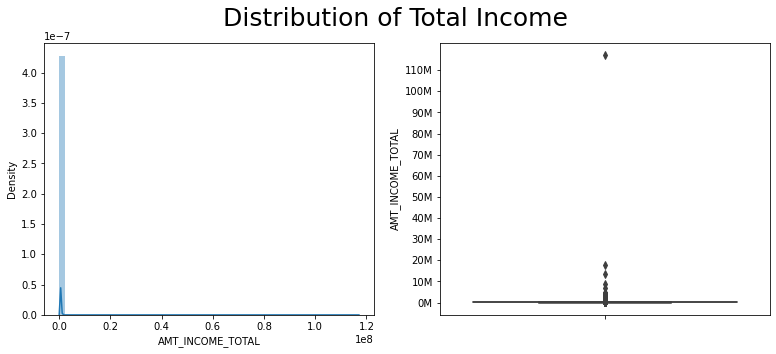

In [28]:
# AMT_INCOME_TOTAL

plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Total Income", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
sns.distplot(Appl_data.AMT_INCOME_TOTAL)

plt.subplot(122)
ticks = np.arange(0,120000000,10000000)
label = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=Appl_data.AMT_INCOME_TOTAL)

plt.show()

- **Inference about outlier**: *There is only one person having very high salary (AMT_INCOME_TOTAL - 117000000.0) OCCUPATION_TYPE - Laborers, AGE_GROUP - 30-40. This will be an outlier*
- **Inference**: *The graph is skewed.*

In [29]:
# Applicants with maximum total income
Appl_data[Appl_data.AMT_INCOME_TOTAL==Appl_data.AMT_INCOME_TOTAL.max()]  # AMT_INCOME_TOTAL - 117000000.0, OCCUPATION_TYPE - Laborers, AGE_GROUP - 30-40, AMT_REQ_CREDIT_BUREAU_YEAR - 1

SK_ID_CURR     TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967  Defaulter         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                           0   34.561644       2.526027   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
12840          18.526027         9.980822           1               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
12840                0                 1           0           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840        Laborers                3                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                            2                    TUESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                       14                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
12840                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
12840                       0                       0   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
12840                        0  Business Entity Type 3   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
12840                     0.0                0                1   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
12840                0                0                0                0   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
12840                0                0                 0                 0   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
12840                 0                 0                           0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
12840                          0                           0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
12840                          0                          0   

       AMT_REQ_CREDIT_BUREAU_YEAR AGE_GROUP AMT_INCOME_GROUP  
12840                           1     30-40        VERY_HIGH

#### AMT_ANNUITY

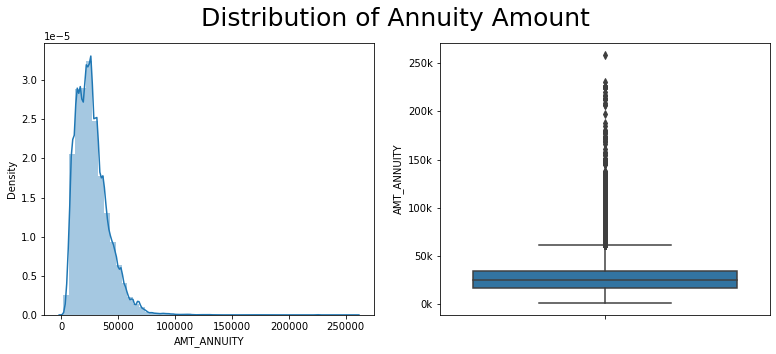

In [30]:
# AMT_ANNUITY
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Annuity Amount", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
sns.distplot(Appl_data.AMT_ANNUITY)
plt.subplot(122)
ticks = np.arange(0,300000,50000)
label = ["{}k".format(i//1000) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=Appl_data.AMT_ANNUITY)
plt.show()

- **Inference 1**: *Person with AMT_ANNUITY=258025.5 will be an outlier.*
- **Inference 2**: *The graph is skewed.*

In [31]:
# Applicants with maximum annuity amount
Appl_data[Appl_data.AMT_ANNUITY==Appl_data.AMT_ANNUITY.max()]  #AMT_INCOME_TOTAL-783000.0, AMT_CREDIT-4050000.0, AGE_GROUP-40-50

SK_ID_CURR   TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
17948      120926  Repayer         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
17948               N             2          783000.0   4050000.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
17948     258025.5        4050000.0   Unaccompanied  Commercial associate   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
17948    Higher education            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
17948                           0   41.578082       0.550685   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
17948           4.189041        12.936986           1               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
17948                1                 1           0           1   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
17948        Managers                4                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
17948                            2                   THURSDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
17948                       14                           1   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
17948                           1                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
17948                       1                       1   

       LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  \
17948                        1  Industry: type 4                0.013699   

       FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
17948                0                0                0                0   

       FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
17948                0                0                0                0   

       FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
17948                 0                 1                 0                 0   

       FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
17948                 0                 0                 0                 0   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
17948                 0                 0                 0                 0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
17948                           0                          0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
17948                           0                          0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AGE_GROUP  \
17948                          0                           0     40-50   

      AMT_INCOME_GROUP  
17948        VERY_HIGH

#### AMT_CREDIT

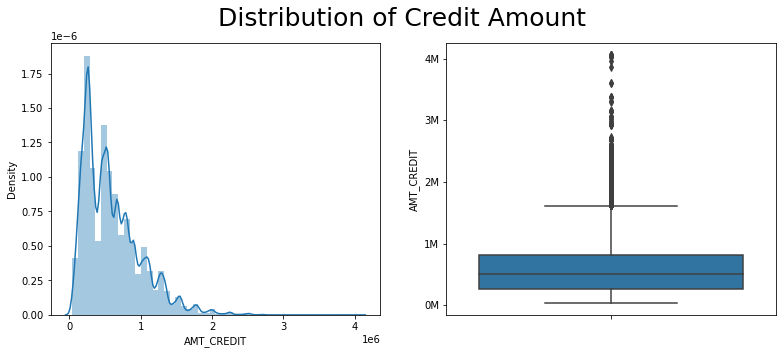

In [32]:
# AMT_CREDIT
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Credit Amount", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
sns.distplot(Appl_data.AMT_CREDIT)
plt.subplot(122)
ticks = np.arange(0,5000000,1000000)
label = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=Appl_data.AMT_CREDIT)
plt.show()

- **Inference 1**: *There are outliers as well as graph is skewed.*
- **Inference 2**: *We can consider values above 2424600 as outliers in this case.*

In [33]:
# Outlier detection using Q3+3*IQR

Appl_data.AMT_CREDIT.quantile(0.75)+3*(Appl_data.AMT_CREDIT.quantile(0.75)-Appl_data.AMT_CREDIT.quantile(0.25))

2424600.0

#### AMT_GOODS_PRICE

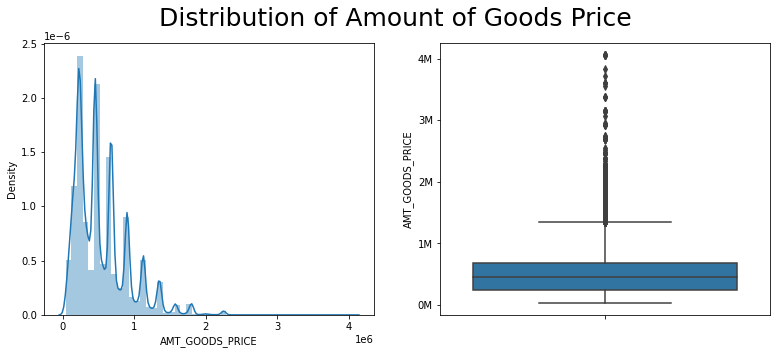

In [34]:
# AMT_GOODS_PRICE
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Amount of Goods Price", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
sns.distplot(Appl_data.AMT_GOODS_PRICE)
plt.subplot(122)
ticks = np.arange(0,5000000,1000000)
label = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=Appl_data.AMT_GOODS_PRICE)
plt.show()

- **Inference 1** : *We can observe outlier here at value 4050000.0.*
- **Inference 2** : *The graph is skewed.*

In [35]:
# maximum amount of goods price
Appl_data.AMT_GOODS_PRICE.max()

4050000.0

In [36]:
# Outlier detection using Q3+3*IQR

Appl_data.AMT_GOODS_PRICE.quantile(0.75)+3*(Appl_data.AMT_GOODS_PRICE.quantile(0.75)-Appl_data.AMT_GOODS_PRICE.quantile(0.25))

2002500.0

#### AGE

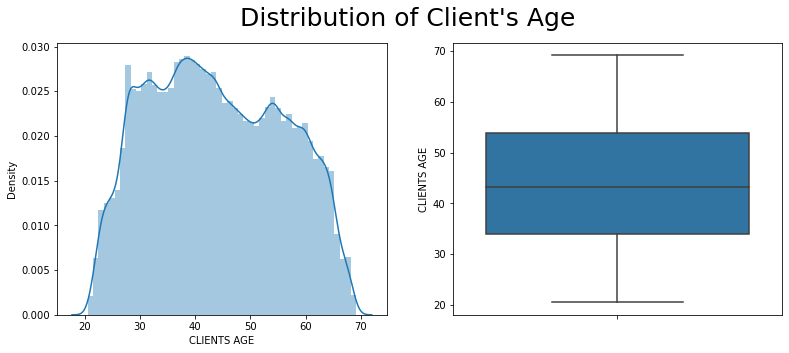

In [37]:
# Applicant's Age
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Client's Age", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
sns.distplot(Appl_data.DAYS_BIRTH)
plt.xlabel("CLIENTS AGE")
plt.subplot(122)
sns.boxplot(y=Appl_data.DAYS_BIRTH)
plt.ylabel("CLIENTS AGE")
plt.show()

- **Inference 1**: *There is no outlier in days birth.*
- **Inference 2**: *The graph is approximately normally distributed.*

#### Years of Current Employment

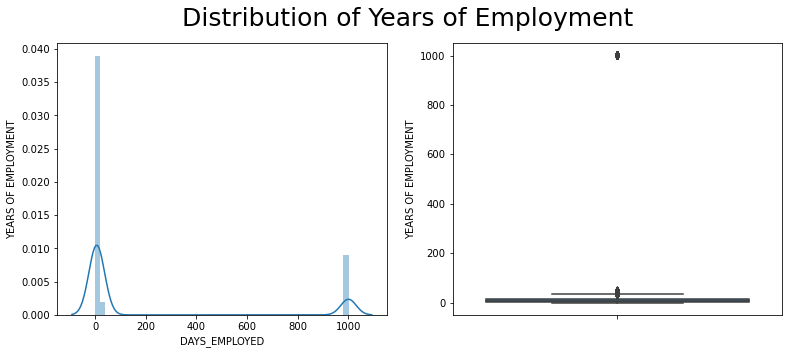

In [38]:
# Years of Employment
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Years of Employment", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
sns.distplot(Appl_data.DAYS_EMPLOYED)
plt.ylabel("YEARS OF EMPLOYMENT")
plt.subplot(122)
sns.boxplot(y=Appl_data.DAYS_EMPLOYED)
plt.ylabel("YEARS OF EMPLOYMENT")
plt.show()

- **Inference**: *People who are employed for approximately 1000 years can surely result as an outlier.*

In [39]:
# applicants with 1000 years of employment
Appl_data[(Appl_data.DAYS_EMPLOYED==Appl_data.DAYS_EMPLOYED.max()) & (Appl_data.DAYS_BIRTH<=Appl_data.DAYS_EMPLOYED.max()) & (Appl_data.TARGET=="Repayer")].loc[:,["TARGET","DAYS_BIRTH","DAYS_EMPLOYED"]]

TARGET  DAYS_BIRTH  DAYS_EMPLOYED
8       Repayer   55.065753    1000.665753
11      Repayer   55.936986    1000.665753
23      Repayer   68.019178    1000.665753
38      Repayer   65.534247    1000.665753
43      Repayer   64.515068    1000.665753
...         ...         ...            ...
307469  Repayer   61.408219    1000.665753
307483  Repayer   68.249315    1000.665753
307487  Repayer   63.356164    1000.665753
307505  Repayer   66.805479    1000.665753
307507  Repayer   56.917808    1000.665753

[52384 rows x 3 columns]

- **Inference**: *In dataset, 52384 repayers have years employed more than their age.*

#### Registration Years

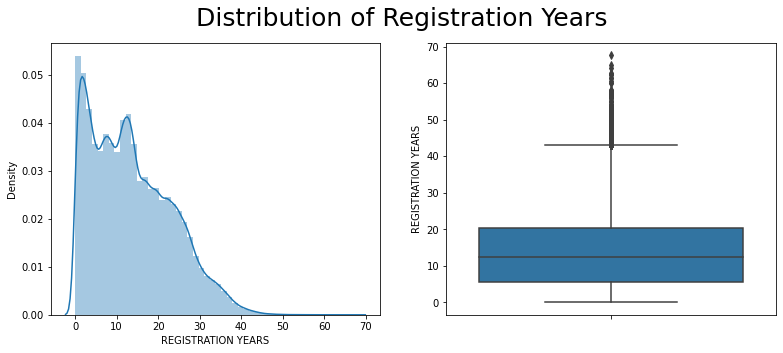

In [40]:
# Registration Years
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Registration Years", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
sns.distplot(Appl_data.DAYS_REGISTRATION)
plt.xlabel("REGISTRATION YEARS")
plt.subplot(122)
sns.boxplot(y=Appl_data.DAYS_REGISTRATION)
plt.ylabel("REGISTRATION YEARS")
plt.show()

- **Inference 1**: *The graph is skewed.*
- **Inference 2**: *The values above 65.45 years will be outliers here.*

In [41]:
# Outlier detection using Q3+3*IQR

Appl_data.DAYS_REGISTRATION.quantile(0.75)+3*(Appl_data.DAYS_REGISTRATION.quantile(0.75)-Appl_data.DAYS_REGISTRATION.quantile(0.25))

65.44657534246575

## Distribution of categorical variable

#### GENDER

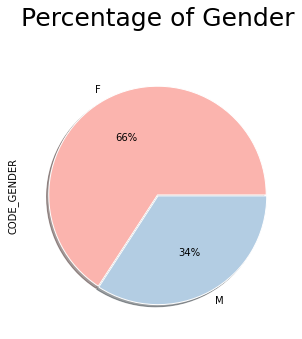

In [42]:
# Gender percentage
plt.figure(figsize=(7,5))
Appl_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},explode=[.01,0],shadow =True)
# Adding and formatting title
plt.title("Percentage of Gender\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference 1**: *More females applied for loans than males.*

#### NAME_CONTRACT_TYPE

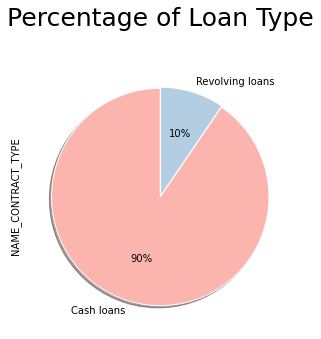

In [43]:
# Loan type percentage
plt.figure(figsize=(7,5))
Appl_data["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 90, wedgeprops={"linewidth":1,"edgecolor":"white"},explode=[.01,0],shadow =True)
# Adding and formatting title
plt.title("Percentage of Loan Type\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference 1**: *People applied more for cash loans than revolving loans.*

#### NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE

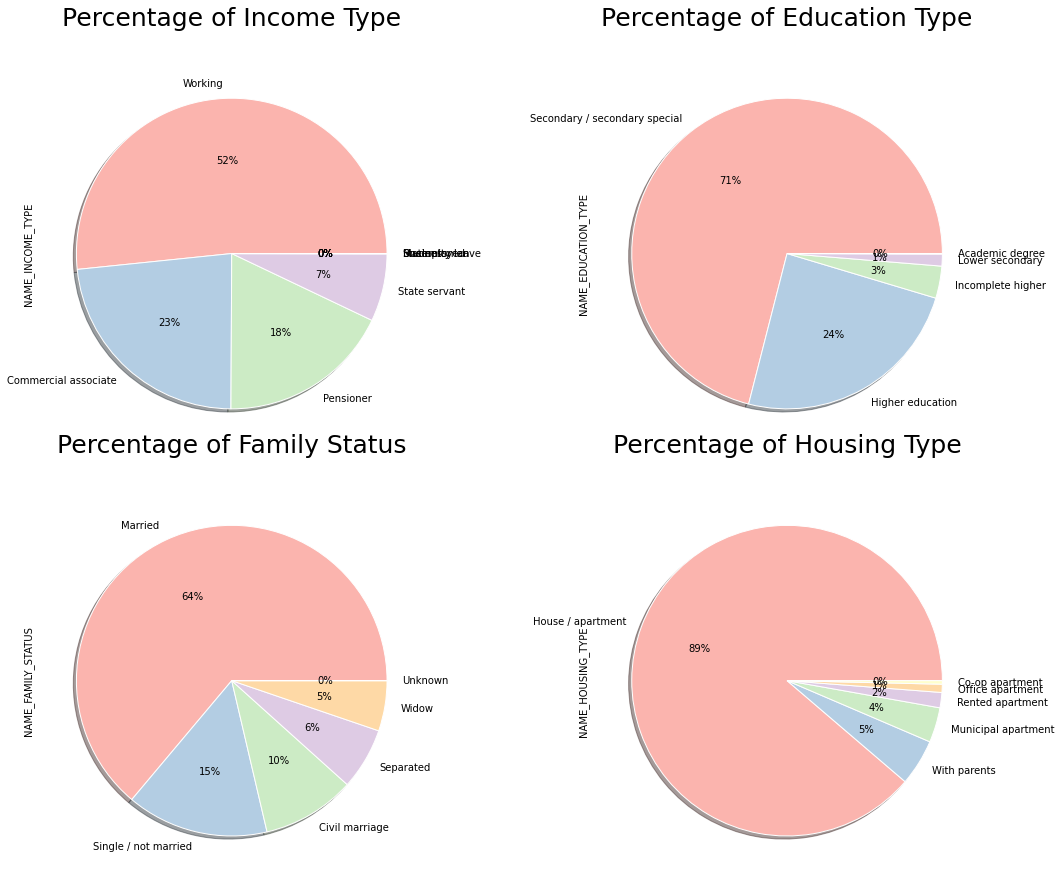

In [44]:
plt.figure(figsize=(19,15))
plt.subplot(221)
Appl_data["NAME_INCOME_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
# Adding and formatting title
plt.title("Percentage of Income Type\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})

plt.subplot(222)
Appl_data["NAME_EDUCATION_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
plt.title("Percentage of Education Type\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})

plt.subplot(223)
Appl_data["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
plt.title("Percentage of Family Status\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})

plt.subplot(224)
Appl_data["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
plt.title("Percentage of Housing Type\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})

plt.subplots_adjust(wspace=0.1, hspace=0.1);

#### INCOME TYPE

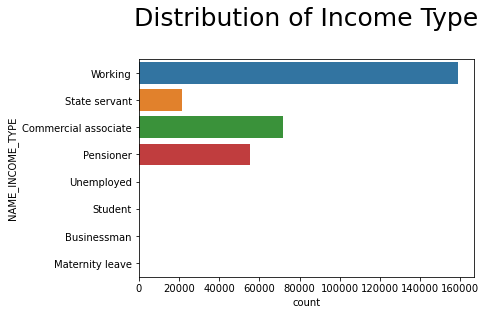

In [45]:
# Distribution of Income Type
sns.countplot(y=Appl_data["NAME_INCOME_TYPE"])
plt.title("Distribution of Income Type\n", fontsize= 25, fontweight = 5, color = 'Black')
plt.show()

- **Inference 1**: *More loan applications are from working income type.*

#### OCCUPATION TYPE

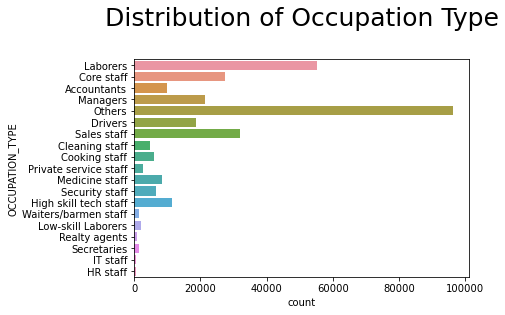

In [46]:
# Distribution of Occupation Type
sns.countplot(y=Appl_data["OCCUPATION_TYPE"])
plt.title("Distribution of Occupation Type\n", fontsize= 25, fontweight = 5, color = 'Black')
plt.show()

- **Inference 1**: *People with occupation type others are very high.*
- **Inference 2**: *Second highest Occupation type is laborers.*

#### ORGANIZATION TYPE

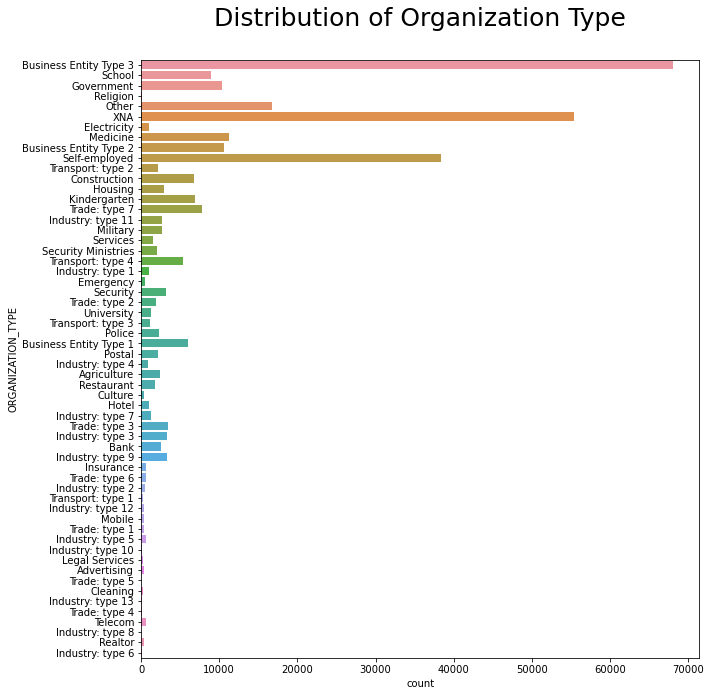

In [47]:
# Distribution of Organization Type
plt.figure(figsize=(10,11))
sns.countplot(y=Appl_data["ORGANIZATION_TYPE"])
plt.title("Distribution of Organization Type\n", fontsize= 25, fontweight = 5, color = 'Black')
plt.show()

- **Inference 1**: *Majority of the loans applications are from Business Entity Type 3.*

# Percentage Imbalance

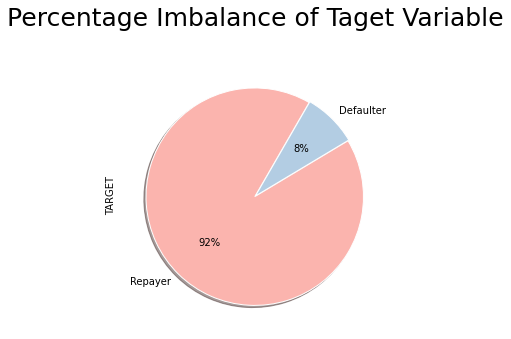

In [48]:
# Percentage Imbalance of Target Variable
plt.figure(figsize=(7,5))
Appl_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 60, wedgeprops={"linewidth":1,"edgecolor":"white"},explode=[.01,0],shadow =True)

# Adding and formatting title
plt.title("Percentage Imbalance of Taget Variable\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference 1**: *The imbalance is high between target variables. There are more repayers compared to defaulters*

## Dividing the dataset into two different datasets on basis of TARGET variable

In [49]:
# Dividing the dataset into two different datasets on basis of TARGET variable
defaulter = Appl_data[Appl_data["TARGET"]=="Defaulter"]
repayer = Appl_data[Appl_data["TARGET"]=="Repayer"]

<div class="alert alert-block alert-info">
<h1><b> Univariate Analysis</b></h1>
</div>

## Univariate Analysis of Categorical Variables on basis of TARGET variable

#### GENDER

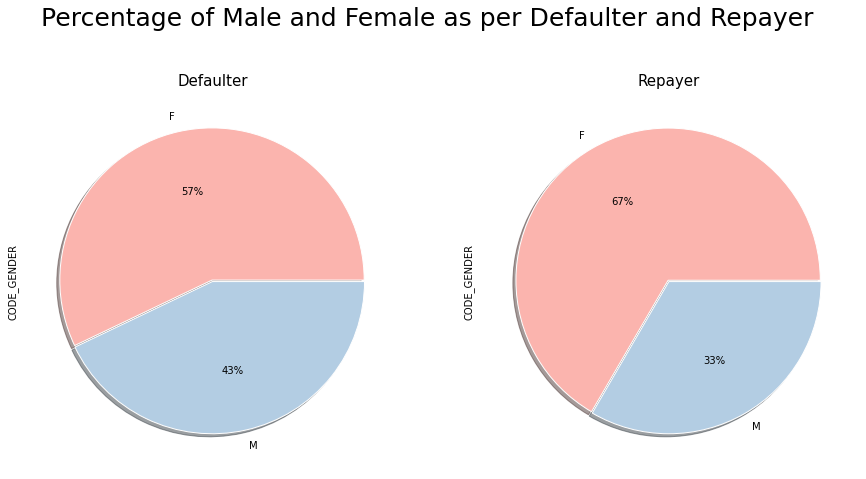

In [50]:
# Percentage of Male and Female as per Defaulter and Repayer
plt.figure(figsize=(15,8))
plt.suptitle("Percentage of Male and Female as per Defaulter and Repayer", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(121)
defaulter["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},explode=[.01,0],shadow =True)
plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

plt.subplot(122)
repayer["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},explode=[.01,0],shadow =True)
plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

plt.show()

- **Inference 1**: *Percentage of female defaulters and repayers are more as compared to male.*

#### NAME_CONTRACT_TYPE

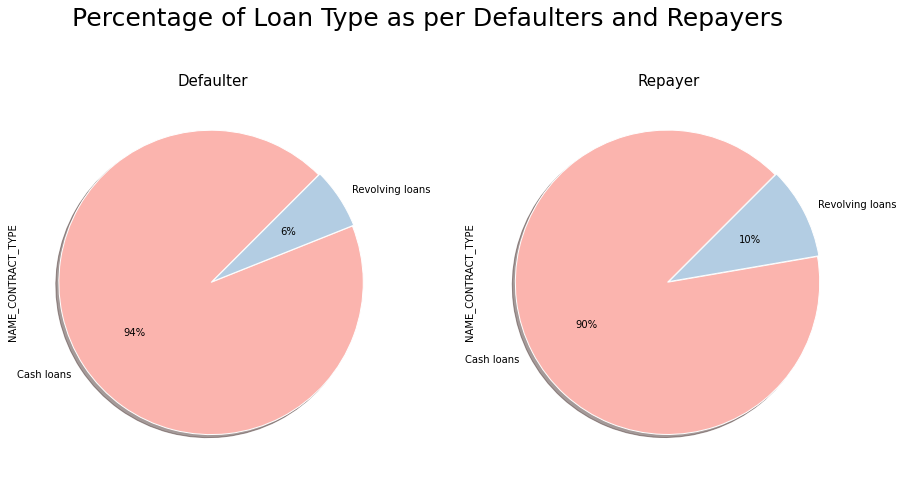

In [51]:
# Percentage of Loan Type as per Defaulters and Repayers
plt.figure(figsize=(15,8))
plt.suptitle("Percentage of Loan Type as per Defaulters and Repayers", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(121)
defaulter["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 45, wedgeprops={"linewidth":1,"edgecolor":"white"},explode=[.01,0],shadow =True)
plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplot(122)
repayer["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 45, wedgeprops={"linewidth":1,"edgecolor":"white"},explode=[.01,0],shadow =True)
plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference 1**: *Percentage of cash loan defaulters is higher than revolving loans among both defaulters and repayers.*

#### NAME_INCOME_TYPE

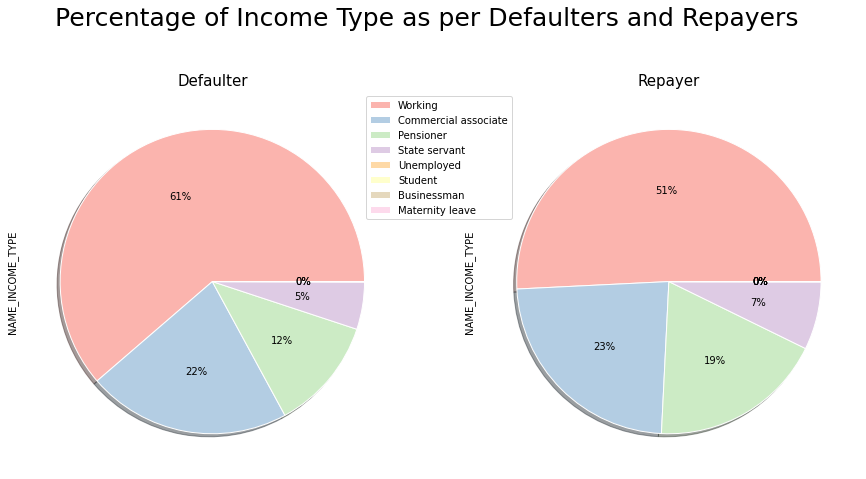

In [52]:
# Percentage of Income Type as per Defaulters and Repayers
plt.figure(figsize=(15,8))
plt.suptitle("Percentage of Income Type as per Defaulters and Repayers", fontsize= 25, fontweight = 5, color = 'Black')
labels1 = Appl_data.NAME_INCOME_TYPE.value_counts().index
plt.subplot(121)
defaulter["NAME_INCOME_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True,labels=None)
plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplot(122)
repayer["NAME_INCOME_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True,labels=None)
plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.legend(labels1,bbox_to_anchor=(.1,1))
plt.show()

- **Inference 1**: *Majority of defaulters and repayers are from working class.*
- **Inference 2**: *Percentage of pensioners are more among repayers than defaulters.*

#### NAME_EDUCATION_TYPE

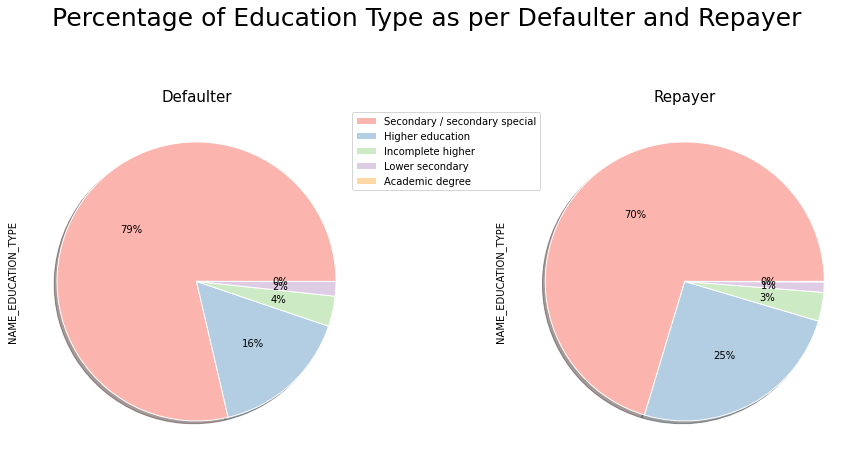

In [53]:
# Percentage of Education Type as per Defaulter and Repayer
plt.figure(figsize=(15,8))
plt.suptitle("Percentage of Education Type as per Defaulter and Repayer", fontsize= 25, fontweight = 5, color = 'Black')
labels1 = Appl_data.NAME_EDUCATION_TYPE.value_counts().index
plt.subplot(121)
defaulter["NAME_EDUCATION_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True,labels=None)
plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplot(122)
repayer["NAME_EDUCATION_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True,labels=None)
plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.legend(labels1,bbox_to_anchor=(.1,1))
plt.show()

- **Inference 1**: *Percentage of people with secondary education are more defaulters.*
- **Inference 2**: *Percentage of people with higher education are more among repayers than defaulters.*  

#### NAME_FAMILY_STATUS

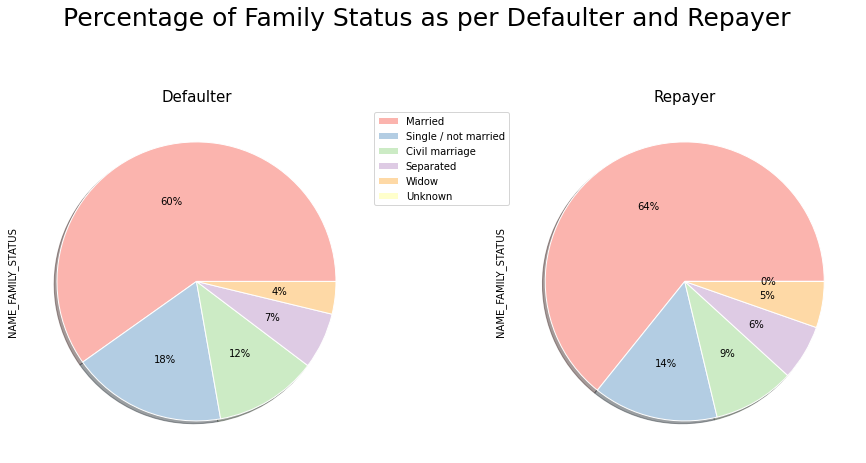

In [54]:
# Percentage of Family Status as per Defaulters and Repayers
plt.figure(figsize=(15,8))
plt.suptitle("Percentage of Family Status as per Defaulter and Repayer", fontsize= 25, fontweight = 5, color = 'Black')
labels1 = Appl_data.NAME_FAMILY_STATUS.value_counts().index

plt.subplot(121)
defaulter["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True,labels=None)
plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplot(122)
repayer["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True,labels=None)
plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.legend(labels1,bbox_to_anchor=(.01,1));

- **Inference 1**: *Percentage of married people are more repayers.*
- **Inference 2**: *Percentage of single and civil marriage people are more among defaulters than repayers.*  

#### NAME_HOUSING_TYPE

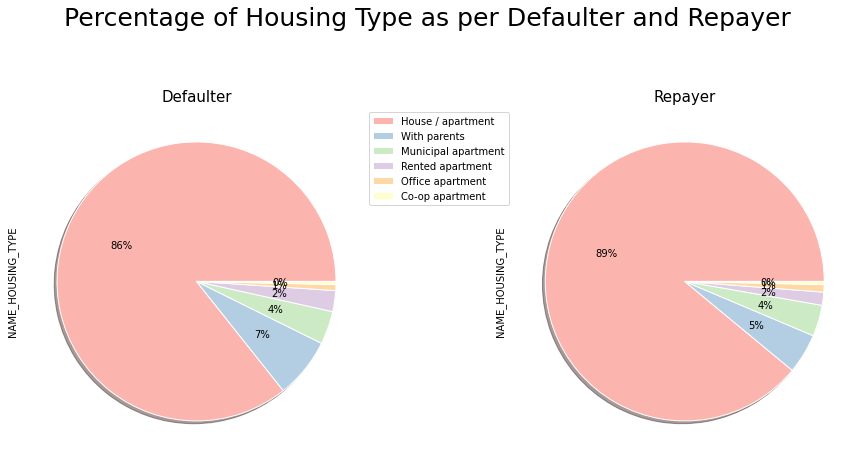

In [55]:
# Percentage of Housing Type as per Defaulter and Repayer
plt.figure(figsize=(15,8))
plt.suptitle("Percentage of Housing Type as per Defaulter and Repayer", fontsize= 25, fontweight = 5, color = 'Black')
labels1 = Appl_data.NAME_HOUSING_TYPE.value_counts().index

plt.subplot(121)
defaulter["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True,labels=None)
plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplot(122)
repayer["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True,labels=None)
plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.legend(labels1,bbox_to_anchor=(.01,1));

- **Inference 1**: *Percentage of people living in house/apartment are more repayers.*

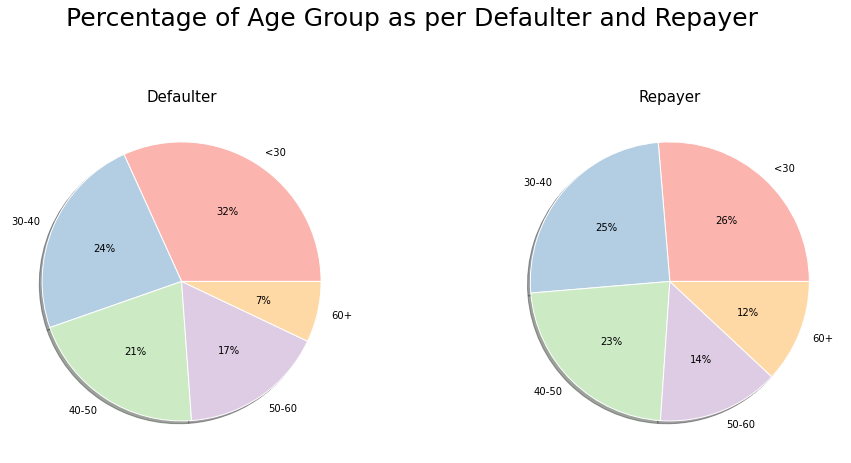

In [56]:
# Percentage of Age Group as per Defaulter and Repayer
plt.figure(figsize=(15,8))
plt.suptitle("Percentage of Age Group as per Defaulter and Repayer", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
plt.pie(defaulter["AGE_GROUP"].value_counts(),autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True,labels=['<30','30-40','40-50','50-60','60+'])
plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplot(122)
plt.pie(repayer["AGE_GROUP"].value_counts(),autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True,labels=['<30','30-40','40-50','50-60','60+'])
plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplots_adjust(wspace=0.4, hspace=0.5);

- **Inference 1**: *Percentage of people in age group less than 30 are more defaulters compared to other age group.*

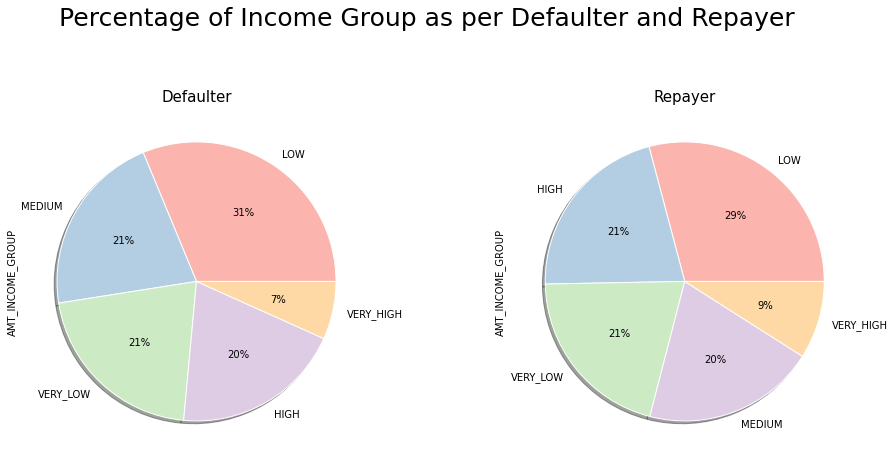

In [57]:
# Percentage of Income Group as per Defaulter and Repayer
plt.figure(figsize=(15,8))
plt.suptitle("Percentage of Income Group as per Defaulter and Repayer", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
defaulter["AMT_INCOME_GROUP"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplot(122)
repayer["AMT_INCOME_GROUP"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplots_adjust(wspace=0.4, hspace=0.5);

- **Inference 1**: *Percentage of people of low income group are more defaulters.*
- **Inference 2**: *Percentage of people with very high income are more among repayers than defaulters.* 

## Univariate Analysis of Numercal Variables on basis of TARGET variable

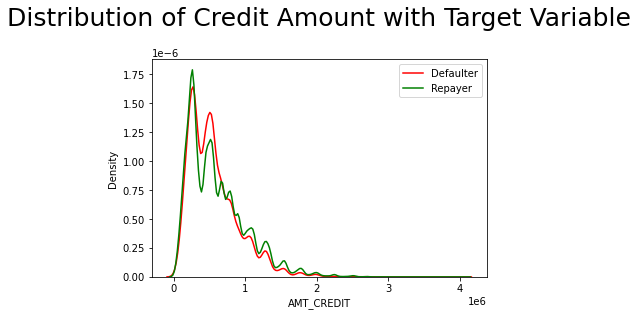

In [58]:
# Distribution of Credit Amount with Target Variable
sns.distplot(defaulter.AMT_CREDIT,hist=False,color="r",label="Defaulter")
sns.distplot(repayer.AMT_CREDIT,hist=False,color="g",label="Repayer")
plt.legend()
plt.title("Distribution of Credit Amount with Target Variable\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference** : *As the goods price increases, there is decrease in defaulters compared to repayers.*

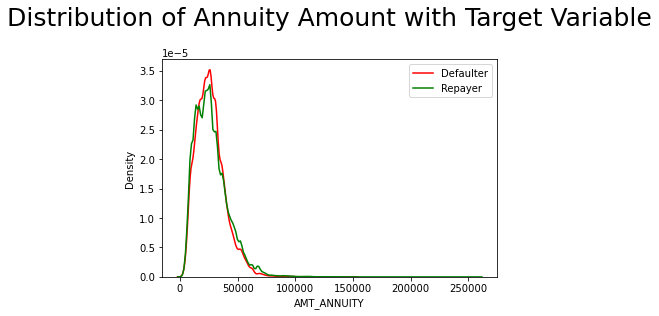

In [59]:
# Distribution of Annuity Amount with Target Variable
sns.distplot(defaulter.AMT_ANNUITY,hist=False,color="r",label="Defaulter")
sns.distplot(repayer.AMT_ANNUITY,hist=False,color="g",label="Repayer")
plt.legend()
plt.title("Distribution of Annuity Amount with Target Variable\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference** : *There is no significant variation in annuity amount between defaulters and repayers.*

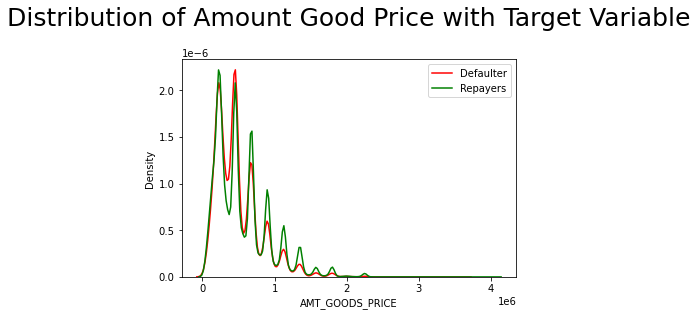

In [60]:
# Distribution of Amount Goods Price with Target Variable
sns.distplot(defaulter.AMT_GOODS_PRICE,hist=False,color="r",label="Defaulter")
sns.distplot(repayer.AMT_GOODS_PRICE,hist=False,color="g",label="Repayers")
plt.legend()
plt.title("Distribution of Amount Good Price with Target Variable\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference** : *There is no significant variation in amount goods price between defaulters and repayers.*

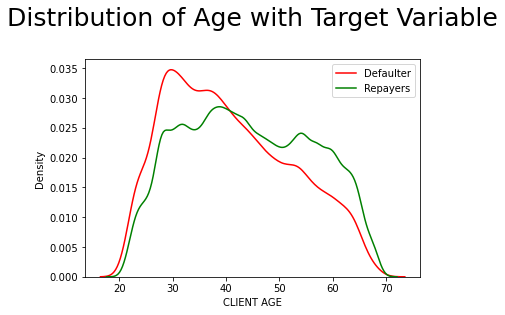

In [61]:
# Distribution of Age with Target Variable
sns.distplot(defaulter.DAYS_BIRTH,hist=False,color="r",label="Defaulter")
sns.distplot(repayer.DAYS_BIRTH,hist=False,color="g",label="Repayers")
plt.legend()
plt.title("Distribution of Age with Target Variable\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.xlabel("CLIENT AGE")
plt.show()

- **Inference** : *There are more defaulters around age 30 and more repayers above 40.*

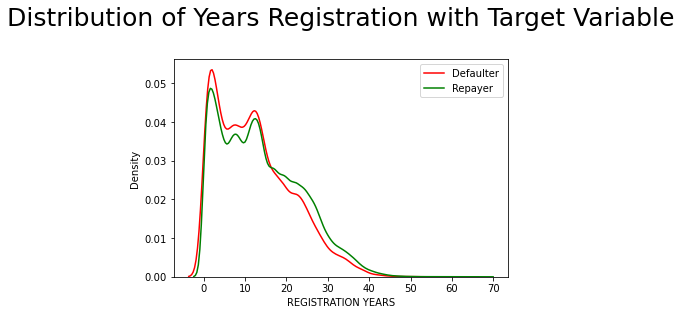

In [62]:
# Distribution of Years Registration with Target Variable
sns.distplot(defaulter.DAYS_REGISTRATION,hist=False,color="r",label="Defaulter")
sns.distplot(repayer.DAYS_REGISTRATION,hist=False,color="g",label="Repayer")
plt.legend()
plt.title("Distribution of Years Registration with Target Variable\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.xlabel("REGISTRATION YEARS")
plt.show()

- **Inference** : *Defaulters are slightly higher over repayers between registration years 0-20. But the trend reverses after 20.*

<div class="alert alert-block alert-info">
<h1><b> Bivariate Analysis</b></h1>
</div>

## Bivariate Analysis of Categorical-Categorical

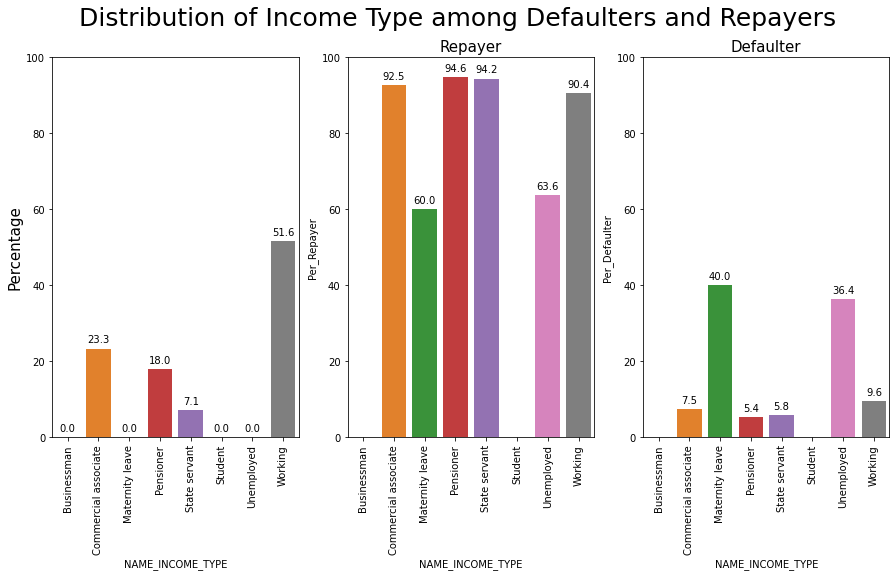

In [63]:
# Distribution of Income Type among Defaulters and Repayers

NAME_INCOME_TYPE = Appl_data.groupby(['NAME_INCOME_TYPE'])['NAME_INCOME_TYPE'].apply(lambda p: p.count()*100/Appl_data['NAME_INCOME_TYPE'].count())

df=Appl_data.groupby(['NAME_INCOME_TYPE',"TARGET"])['NAME_INCOME_TYPE'].apply(lambda p: p.count())
df = df.unstack()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,7))
plt.suptitle("Distribution of Income Type among Defaulters and Repayers\n", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(131)
ax=sns.barplot(NAME_INCOME_TYPE.index,NAME_INCOME_TYPE.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.index,df["Per_Repayer"])
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.subplot(133)
ax1=sns.barplot(df.index,df["Per_Defaulter"])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)


- **Inference 1**: *Percentage of working people applied for loan is highest among all.*
- **Inference 2**: *People with commercial associate, persioners, state servant and working income type have maximum percentage of repayers.*
- **Inference 3**: *People with maternity leave and unemployed income type have maximum percentage of defaulters than others.*

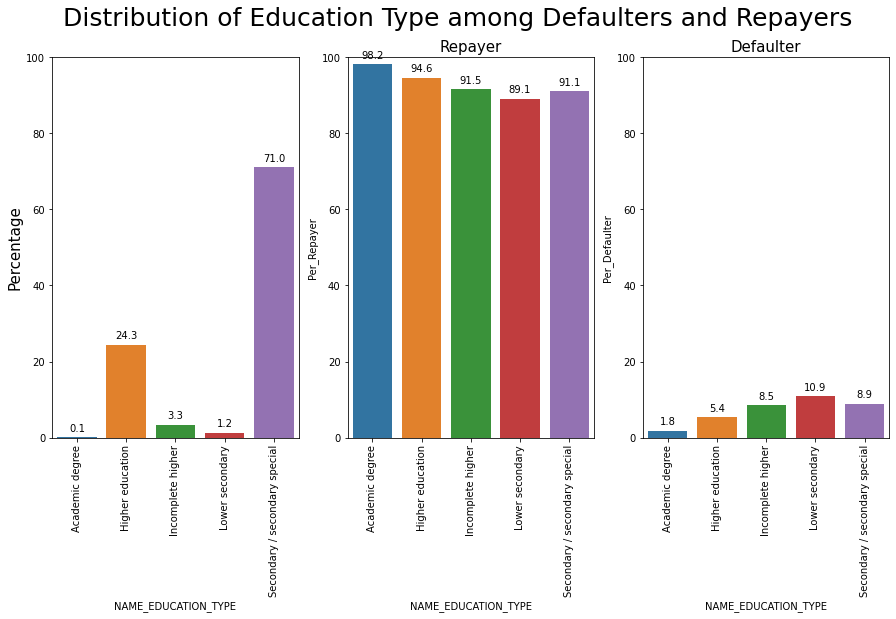

In [64]:
# Distribution of Education Type among Defaulters and Repayers

NAME_EDUCATION_TYPE = Appl_data.groupby(['NAME_EDUCATION_TYPE'])['NAME_EDUCATION_TYPE'].apply(lambda p: p.count()*100/Appl_data['NAME_INCOME_TYPE'].count())

df=Appl_data.groupby(['NAME_EDUCATION_TYPE',"TARGET"])['NAME_EDUCATION_TYPE'].apply(lambda p: p.count())
df = df.unstack()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,7))
plt.suptitle("Distribution of Education Type among Defaulters and Repayers\n", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(131)
ax=sns.barplot(NAME_EDUCATION_TYPE.index,NAME_EDUCATION_TYPE.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.index,df["Per_Repayer"])
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.subplot(133)
ax1=sns.barplot(df.index,df["Per_Defaulter"])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

- **Inference 1**: *Percentage of people with Secondary education type is highest.*
- **Inference 2**: *People with lower secondary education type has highest percentage of defaulters.*
- **Inference 3**: *People with academic degree education type has highest percentage of repayers.*

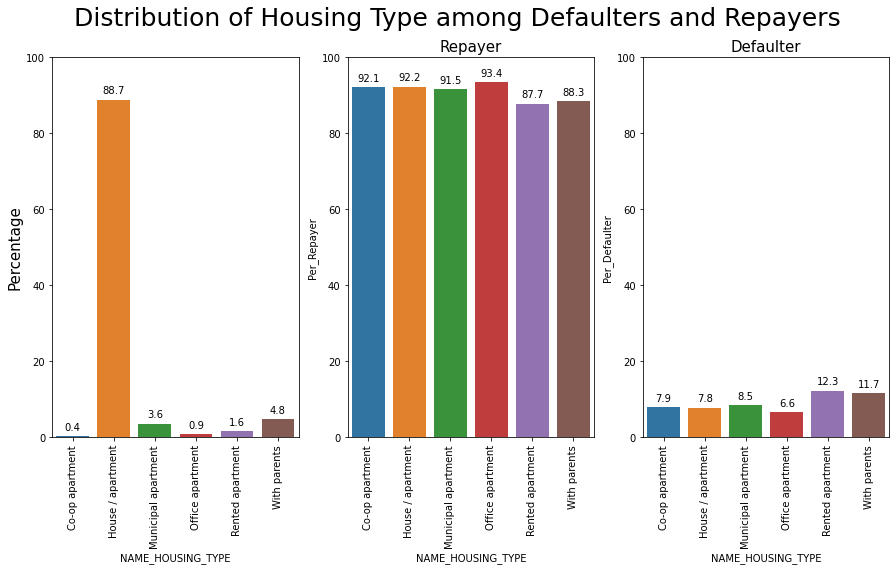

In [65]:
# Distribution of Housing Type among Defaulters and Repayers

NAME_HOUSING_TYPE = Appl_data.groupby(['NAME_HOUSING_TYPE'])['NAME_HOUSING_TYPE'].apply(lambda p: p.count()*100/Appl_data['NAME_HOUSING_TYPE'].count())

df=Appl_data.groupby(['NAME_HOUSING_TYPE',"TARGET"])['NAME_HOUSING_TYPE'].apply(lambda p: p.count())
df = df.unstack()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,7))
plt.suptitle("Distribution of Housing Type among Defaulters and Repayers\n", fontsize= 25, fontweight = 5, color = 'Black')
    
plt.subplot(131)
ax=sns.barplot(NAME_HOUSING_TYPE.index,NAME_HOUSING_TYPE.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.index,df["Per_Repayer"])
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.subplot(133)
ax1=sns.barplot(df.index,df["Per_Defaulter"])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

- **Inference 1**: *Percentage of people having House/apartment applied for the loan are very high.*
- **Inference 2**: *People living in rented apartment form highest percentage of defaulters.*

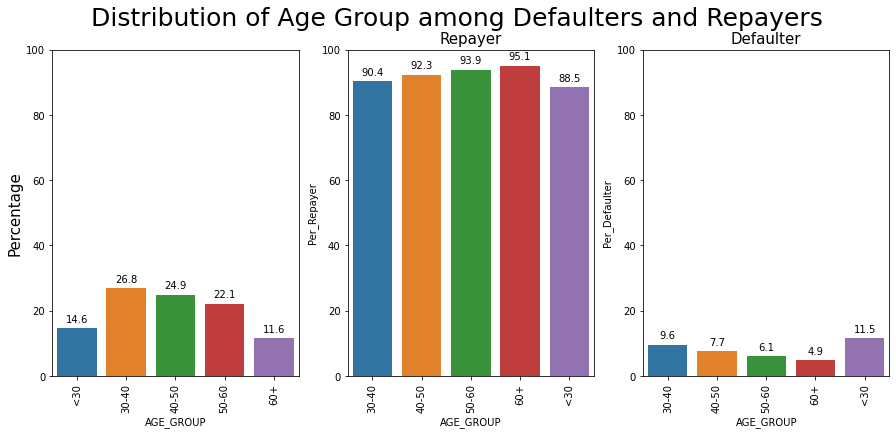

In [66]:
# Distribution of Age Group among Defaulters and Repayers

AGE_GROUP = Appl_data.groupby(['AGE_GROUP'])['AGE_GROUP'].apply(lambda p: p.count()*100/Appl_data['AGE_GROUP'].count())

df=Appl_data.groupby(['AGE_GROUP',"TARGET"])['AGE_GROUP'].apply(lambda p: p.count())
df = df.unstack()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,6))
plt.suptitle("Distribution of Age Group among Defaulters and Repayers\n", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(131)
ax=sns.barplot(AGE_GROUP.index,AGE_GROUP.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.index,df["Per_Repayer"])
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.subplot(133)
ax1=sns.barplot(df.index,df["Per_Defaulter"])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

- **Inference 1**: *More number of loan applicants are in the age group 30-40.*
- **Inference 2**: *Percentage of people of age group less than 30 is 11.5% which is highest in defaulters.*
- **Inference 3**: *There are less applicants above age group 60, but majority of them are repayers.*

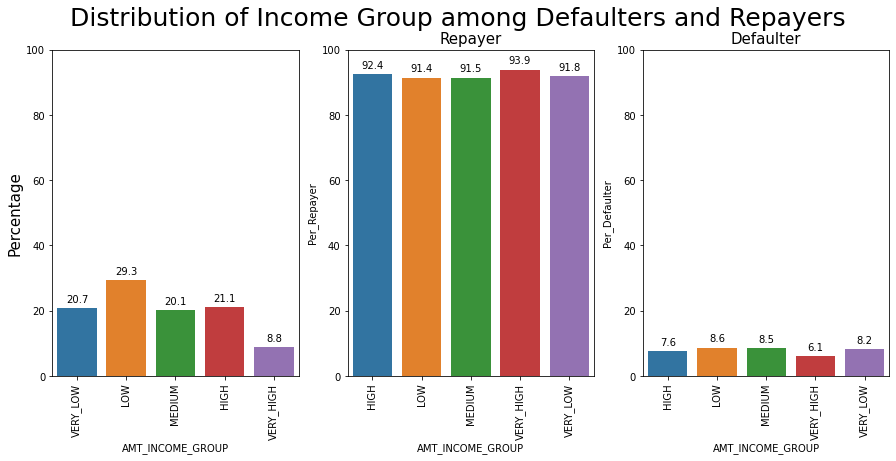

In [67]:
# Distribution of Income Group among Defaulters and Repayers

AMT_INCOME_GROUP = Appl_data.groupby(['AMT_INCOME_GROUP'])['AMT_INCOME_GROUP'].apply(lambda p: p.count()*100/Appl_data['AMT_INCOME_GROUP'].count())

df=Appl_data.groupby(['AMT_INCOME_GROUP',"TARGET"])['AMT_INCOME_GROUP'].apply(lambda p: p.count())
df = df.unstack()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,6))
plt.suptitle("Distribution of Income Group among Defaulters and Repayers\n", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(131)
ax=sns.barplot(AMT_INCOME_GROUP.index,AMT_INCOME_GROUP.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.index,df["Per_Repayer"])
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.subplot(133)
ax1=sns.barplot(df.index,df["Per_Defaulter"])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

- **Inference 1**: *More number of loan applicants are with low income, however they form the highest percentage of defaulters.*
- **Inference 2**: *There are very less applicants with very high income and they are the least defaulters.*

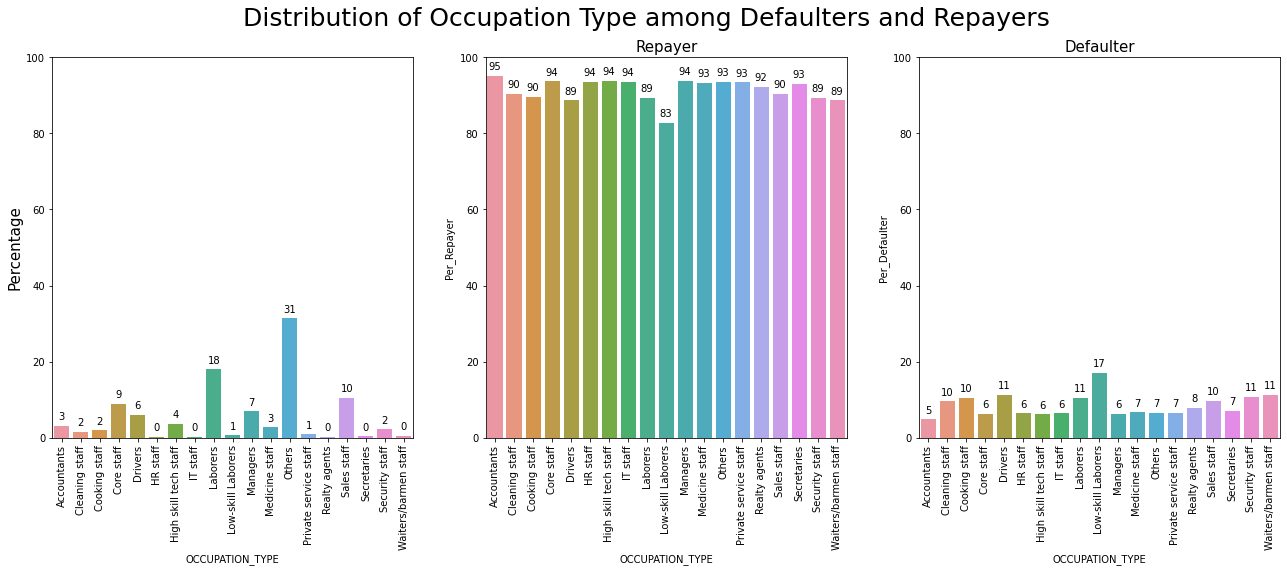

In [68]:
# Distribution of Occupation Type among Defaulters and Repayers

OCCUPATION_TYPE = Appl_data.groupby(['OCCUPATION_TYPE'])['OCCUPATION_TYPE'].apply(lambda p: p.count()*100/Appl_data['OCCUPATION_TYPE'].count())

df=Appl_data.groupby(['OCCUPATION_TYPE',"TARGET"])['OCCUPATION_TYPE'].apply(lambda p: p.count())
df = df.unstack()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(22,7))
plt.suptitle("Distribution of Occupation Type among Defaulters and Repayers\n", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(131)
ax=sns.barplot(OCCUPATION_TYPE.index,OCCUPATION_TYPE.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.index,df["Per_Repayer"])
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.subplot(133)
ax1=sns.barplot(df.index,df["Per_Defaulter"])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

- **Inference 1**: *Percentage of people in Low skill laborers are very less but has maximum percentage (17%) of defaulters.*

## Bivariate Analysis of Categorical-Numerical

#### AMT_CREDIT

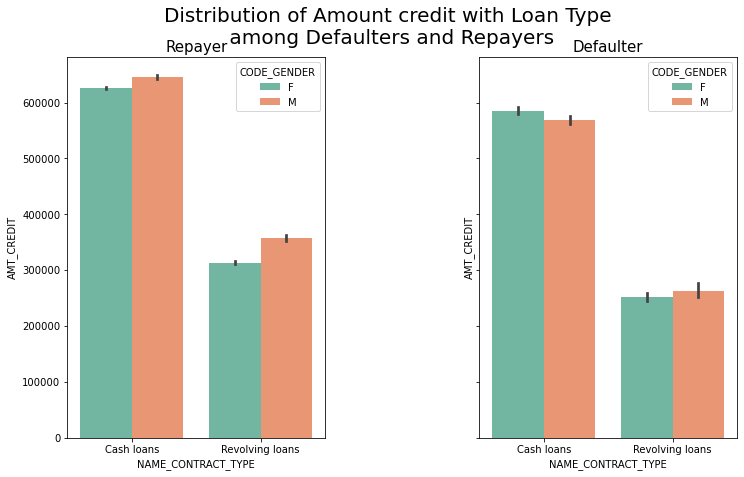

In [69]:
# Amount Credit Vs Loan Type

fig,ax = plt.subplots(ncols = 2,figsize=(12,7),sharey=True)
plt.suptitle("Distribution of Amount credit with Loan Type \n among Defaulters and Repayers \n", fontsize= 20, fontweight = 5, color = 'Black')

sns.barplot(ax=ax[0],x=repayer["NAME_CONTRACT_TYPE"],y=repayer["AMT_CREDIT"],hue=repayer["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[0].set_title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

sns.barplot(ax=ax[1],x=defaulter["NAME_CONTRACT_TYPE"],y=defaulter["AMT_CREDIT"],hue=defaulter["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[1].set_title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

plt.subplots_adjust(wspace=0.6, hspace=0.6);

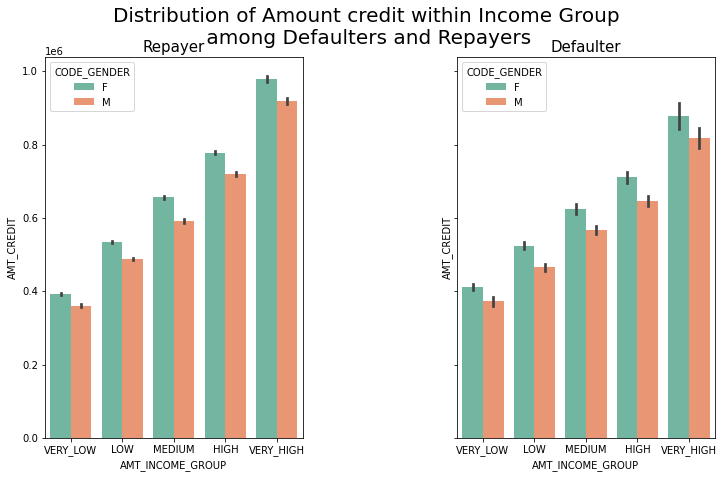

In [70]:
# Amount Credit Vs Amount Income Group

fig,ax = plt.subplots(ncols = 2,figsize=(12,7),sharey=True)
plt.suptitle("Distribution of Amount credit within Income Group \n among Defaulters and Repayers \n", fontsize= 20, fontweight = 5, color = 'Black')

sns.barplot(ax=ax[0],x=repayer["AMT_INCOME_GROUP"],y=repayer["AMT_CREDIT"],hue=repayer["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[0].set_title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

sns.barplot(ax=ax[1],x=defaulter["AMT_INCOME_GROUP"],y=defaulter["AMT_CREDIT"],hue=defaulter["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[1].set_title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

plt.subplots_adjust(wspace=0.6, hspace=0.6);

- **Inference 1**: *Credit amount for females are more compared to males.*
- **Inference 2**: *Credit amount on loan increases with salary.*
- **Inference 3**: *People with very high salary and credit amount are more repayers than defaulters.*

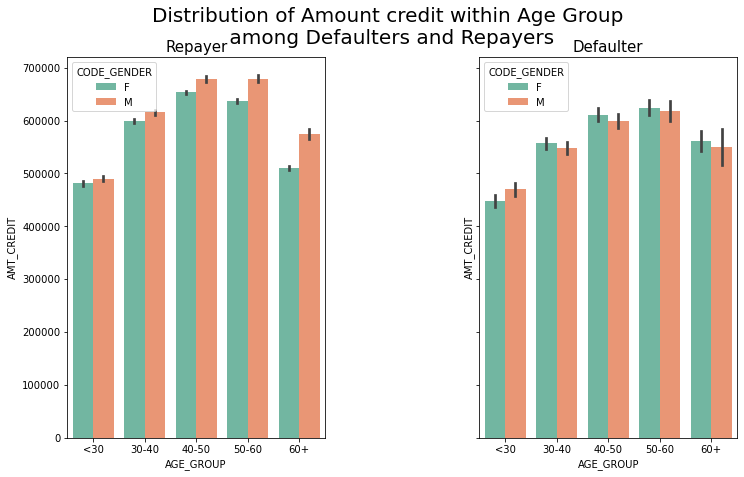

In [71]:
# Amount Credit Vs Age Group

fig,ax = plt.subplots(ncols = 2,figsize=(12,7),sharey=True)
plt.suptitle("Distribution of Amount credit within Age Group \n among Defaulters and Repayers \n", fontsize= 20, fontweight = 5, color = 'Black')

sns.barplot(ax=ax[1],x=defaulter["AGE_GROUP"],y=defaulter["AMT_CREDIT"],hue=defaulter["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[1].set_title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

sns.barplot(ax=ax[0],x=repayer["AGE_GROUP"],y=repayer["AMT_CREDIT"],hue=repayer["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[0].set_title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplots_adjust(wspace=0.6, hspace=0.5);

- **Inference 1**: *Female of age group above 30 are defaulters as compared to male.*
- **Inference 2**: *More males are repayers than females.*
- **Inference 3**: *People in age group 30-50 with high credit amount seems to be repayers .*

#### AMT_ANNUITY

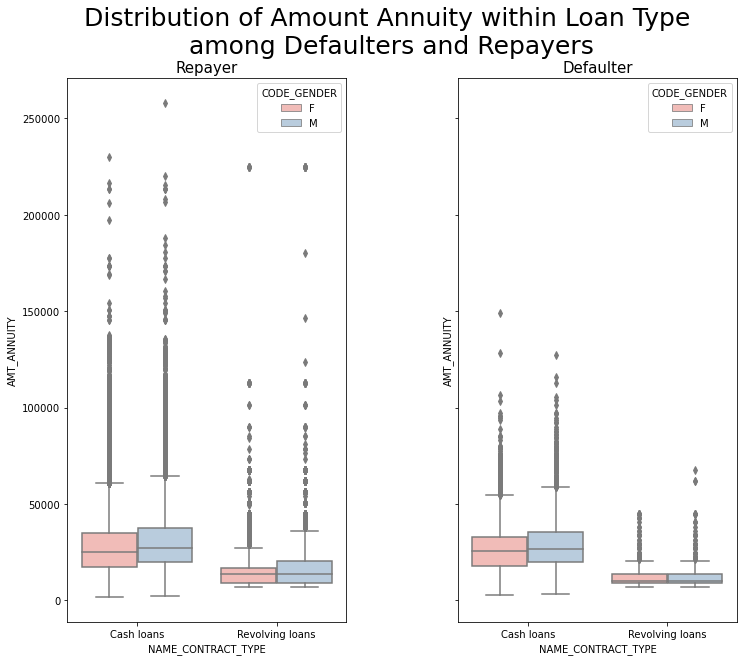

In [72]:
# Amount Annuity Vs Loan Type

fig,ax = plt.subplots(ncols = 2,figsize=(12,10),sharey=True)
plt.suptitle("Distribution of Amount Annuity within Loan Type \n among Defaulters and Repayers \n", fontsize= 25, fontweight = 5, color = 'Black')

sns.boxplot(ax=ax[1],x=defaulter["NAME_CONTRACT_TYPE"],y=defaulter["AMT_ANNUITY"],hue=defaulter["CODE_GENDER"],hue_order=["F","M"],palette="Pastel1")
ax[1].set_title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

sns.boxplot(ax=ax[0],x=repayer["NAME_CONTRACT_TYPE"],y=repayer["AMT_ANNUITY"],hue=repayer["CODE_GENDER"],hue_order=["F","M"],palette="Pastel1")
ax[0].set_title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplots_adjust(wspace=0.4, hspace=0.5);

- **Inference 1**: *People with high loan annuity amount for cash loans are repayers.*
- **Inference 2**: *People with very low loan annuity amount are defaulters.*
- **Inference 3**: *Annuity amount for cash loan is high compared to revolving loans.*

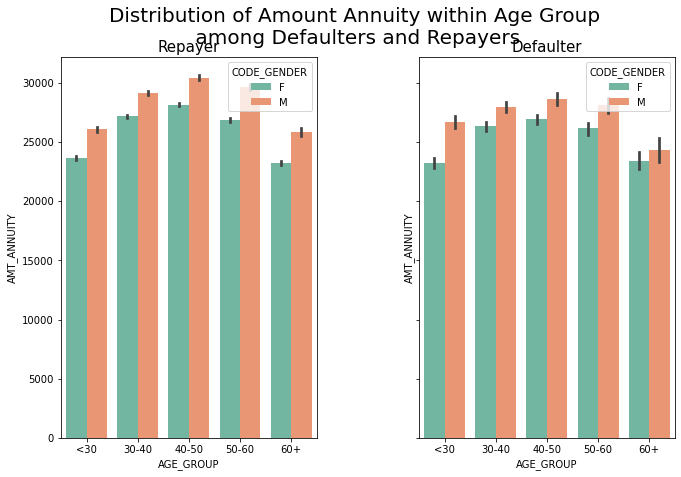

In [73]:
# Amount Annuity Vs Age Group
fig,ax = plt.subplots(ncols = 2,figsize=(11,7),sharey=True)
plt.suptitle("Distribution of Amount Annuity within Age Group \n among Defaulters and Repayers \n", fontsize= 20, fontweight = 5, color = 'Black')

sns.barplot(ax=ax[1],x=defaulter["AGE_GROUP"],y=defaulter["AMT_ANNUITY"],hue=defaulter["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[1].set_title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

sns.barplot(ax=ax[0],x=repayer["AGE_GROUP"],y=repayer["AMT_ANNUITY"],hue=repayer["CODE_GENDER"],hue_order=["F","M"],palette="Set2") ## Spectral  turbo flare  
ax[0].set_title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplots_adjust(wspace=0.4, hspace=0.5);

- **Inference 1**: *Loan annuity amount for male are more compared to female in both cases.*
- **Inference 2**: *Males of age group 40-50 are more repayers with high loan annuity.*
- **Inference 3**: *Percentage of males defaulters below age 30 is significantly more than female below age 30.*

#### AMT_INCOME_TOTAL

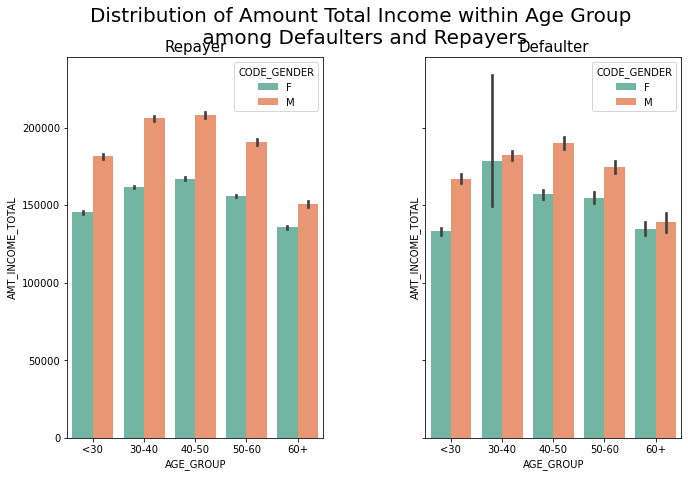

In [74]:
# Amount Total Income Vs Age Group

fig,ax = plt.subplots(ncols = 2,figsize=(11,7),sharey=True)
plt.suptitle("Distribution of Amount Total Income within Age Group \n among Defaulters and Repayers \n", fontsize= 20, fontweight = 5, color = 'Black')

sns.barplot(ax=ax[1],x=defaulter["AGE_GROUP"],y=defaulter["AMT_INCOME_TOTAL"],hue=defaulter["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[1].set_title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

sns.barplot(ax=ax[0],x=repayer["AGE_GROUP"],y=repayer["AMT_INCOME_TOTAL"],hue=repayer["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[0].set_title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplots_adjust(wspace=0.4, hspace=0.5);

- **Inference 1**: *Female of age group 30-40 with high salary are defaulters.*
- **Inference 2**: *Males of age group 30-50 are repayers showing decent salary.*
- **Inference 3**: *Male are earning more salary than female among all age groups.*

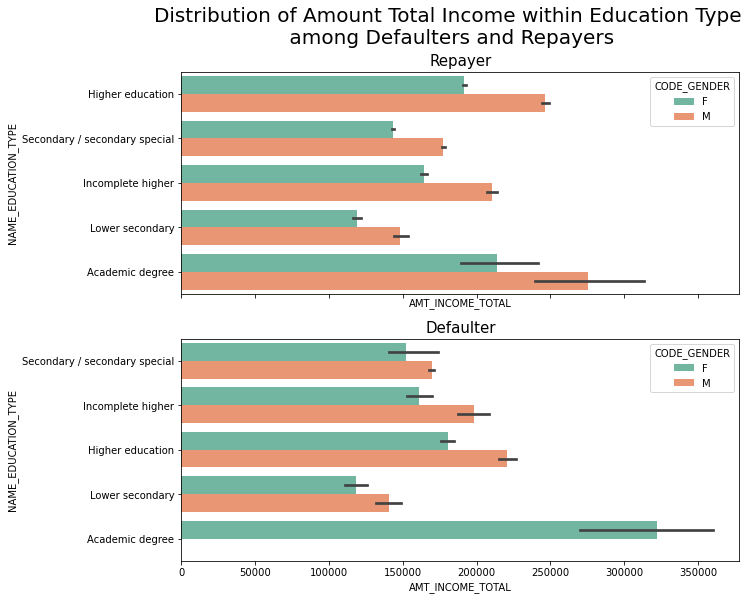

In [75]:
# Amount Total Income Vs Education Type

fig,ax = plt.subplots(nrows = 2,figsize=(10,9),sharex=True)
plt.suptitle("Distribution of Amount Total Income within Education Type \n among Defaulters and Repayers \n", fontsize= 20, fontweight = 5, color = 'Black')

sns.barplot(ax=ax[1],y=defaulter["NAME_EDUCATION_TYPE"],x=defaulter["AMT_INCOME_TOTAL"],hue=defaulter["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[1].set_title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

sns.barplot(ax=ax[0],y=repayer["NAME_EDUCATION_TYPE"],x=repayer["AMT_INCOME_TOTAL"],hue=repayer["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[0].set_title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'});

- **Inference 1**: *Female having academic degree and high income are defaulters while males in this category are repayers.*
- **Inference 2**: *There are no male defaulters with an academic degree but female defaulters are high with an acedemic degree.*
- **Inference 3**: *People with lower secondory education appear to be less repayers compared to any other education type.*

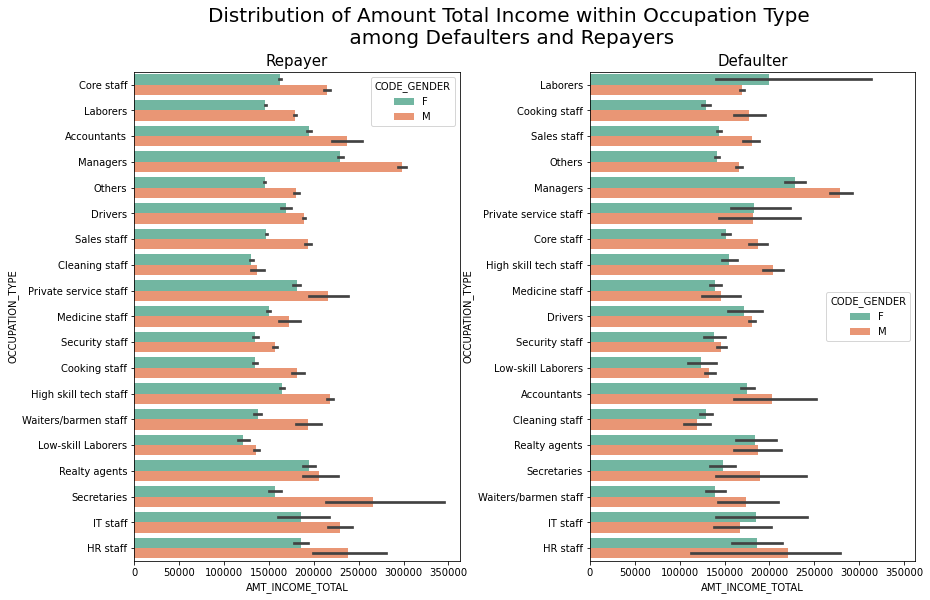

In [76]:
# Amount Total Income Vs Occupation Type

fig,ax = plt.subplots(ncols = 2,figsize=(14,9),sharex=True)
plt.suptitle("Distribution of Amount Total Income within Occupation Type \n among Defaulters and Repayers \n", fontsize= 20, fontweight = 5, color = 'Black')

sns.barplot(ax=ax[1],y=defaulter["OCCUPATION_TYPE"],x=defaulter["AMT_INCOME_TOTAL"],hue=defaulter["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[1].set_title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

sns.barplot(ax=ax[0],y=repayer["OCCUPATION_TYPE"],x=repayer["AMT_INCOME_TOTAL"],hue=repayer["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[0].set_title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'});
plt.subplots_adjust(wspace=0.4, hspace=0.5);

- **Inference 1**: *Females from occupation type laborers with high salary are more defaulters. These records were also found in the outlier detection.*
- **Inference 2**: *Males from occupation type Secretaries with high salary are more repayers.*

#### AMT_GOODS_PRICE

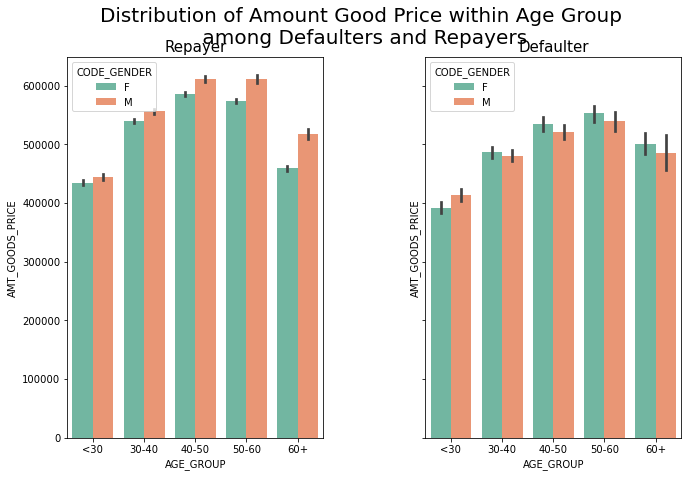

In [77]:
# AMT_GOODS_PRICE Vs Age Group

fig,ax = plt.subplots(ncols = 2,figsize=(11,7),sharey=True)
plt.suptitle("Distribution of Amount Good Price within Age Group \n among Defaulters and Repayers \n", fontsize= 20, fontweight = 5, color = 'Black')

sns.barplot(ax=ax[1],x=defaulter["AGE_GROUP"],y=defaulter["AMT_GOODS_PRICE"],hue=defaulter["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[1].set_title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})

sns.barplot(ax=ax[0],x=repayer["AGE_GROUP"],y=repayer["AMT_GOODS_PRICE"],hue=repayer["CODE_GENDER"],hue_order=["F","M"],palette="Set2")
ax[0].set_title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
plt.subplots_adjust(wspace=0.4, hspace=0.5);

- **Inference 1**: *Female of age group 30+ are more defaulters than male.*
- **Inference 2**: *In the age group below 30 females are less defaulters compared to males.*
- **Inference 3**: *When goods price is very high males are more repayers than female.*

## Bivariate Analysis of Numerical-Numerical

### Repayers

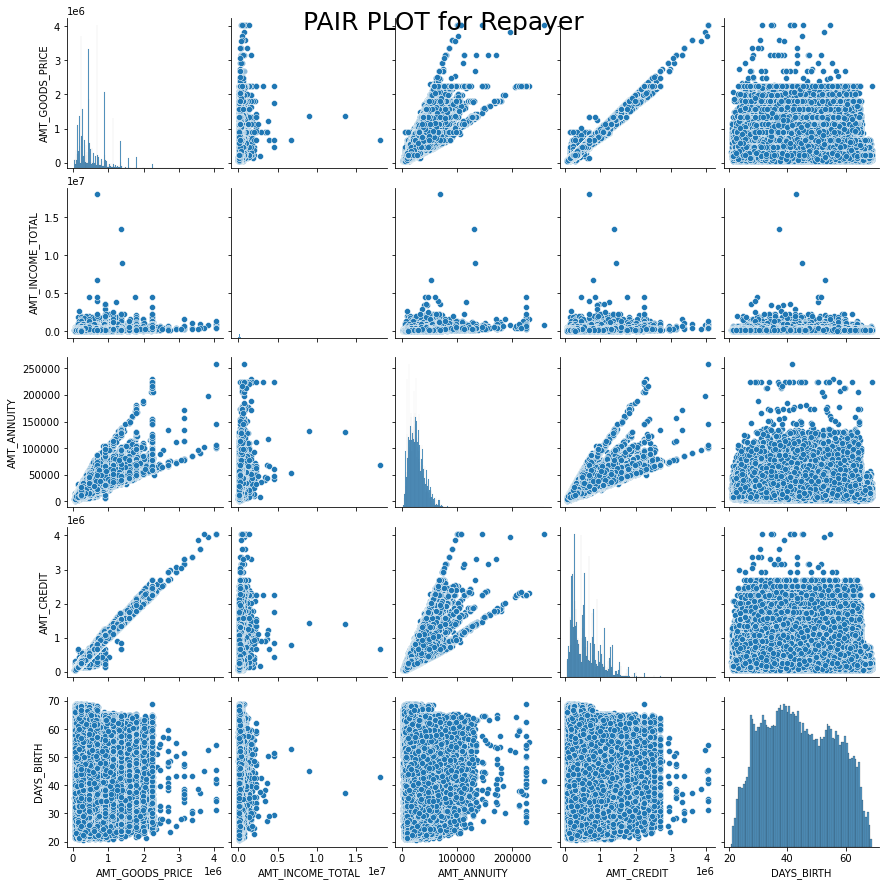

In [78]:
# Pairplots for Repayers
sns.pairplot(repayer[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','DAYS_BIRTH']])
plt.suptitle("PAIR PLOT for Repayer\n", fontsize= 25, fontweight = 5, color = 'Black')
plt.show()

- **Inference 1** : *With the increase in AMT_GOODS_PRICE, AMT_CREDIT and AMT_ANNUITY also increases.*
- **Inference 2** : *With the increase in AMT_ANNUITY, AMT_CREDIT increases.*

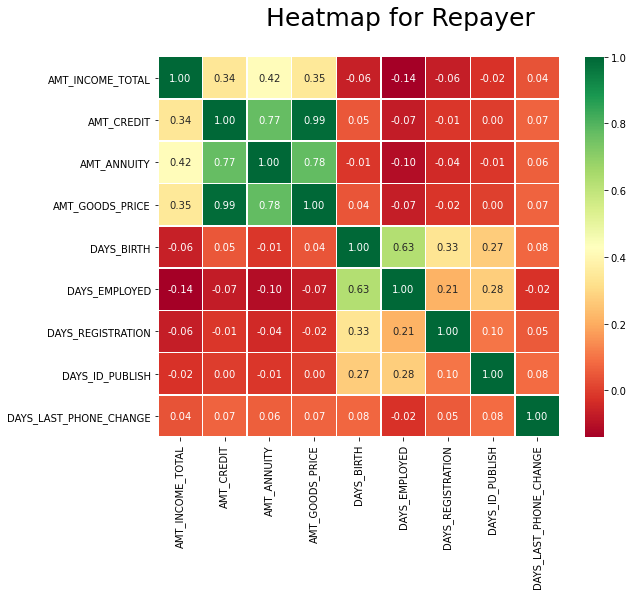

In [79]:
# Heatmap for repayers
corr_r = repayer[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr_r,annot=True,fmt='.2f',cmap="RdYlGn", linewidth=0.5)
plt.suptitle("Heatmap for Repayer\n", fontsize= 25, fontweight = 5, color = 'Black')
plt.show()

### Defaulters

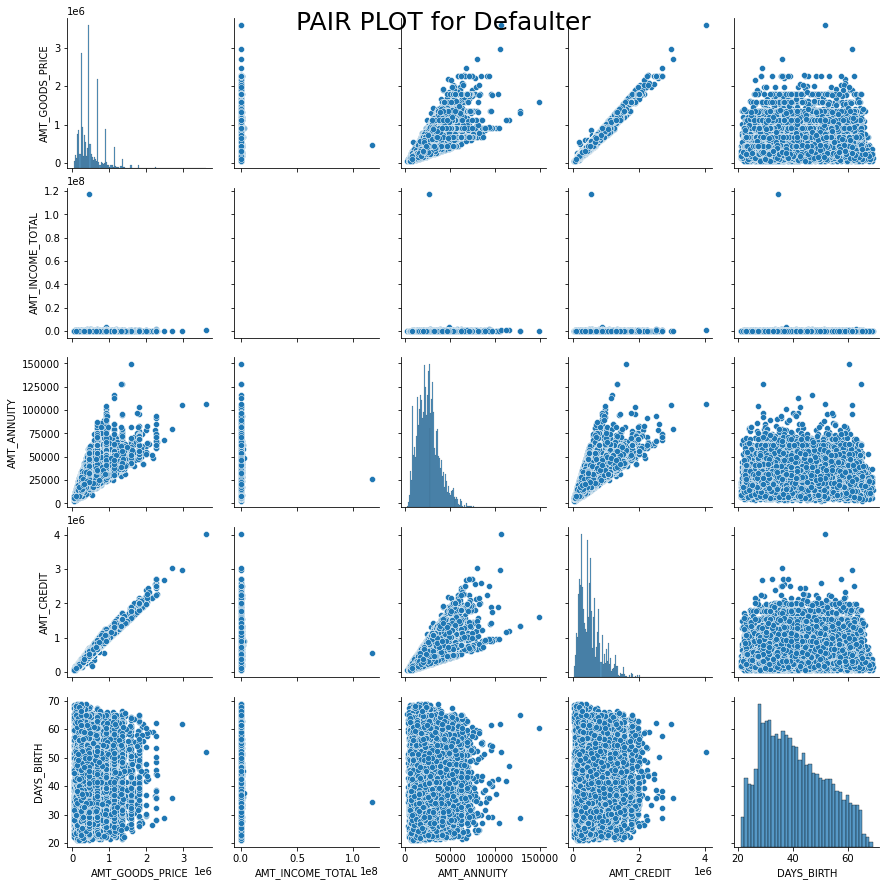

In [80]:
# Pairplot for defaulters
sns.pairplot(defaulter[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','DAYS_BIRTH']])
plt.suptitle("PAIR PLOT for Defaulter\n", fontsize= 25, fontweight = 5, color = 'Black')
plt.show()

- **Inference 1** : *With the increase in AMT_GOODS_PRICE, AMT_CREDIT and AMT_ANNUITY also increases.*
- **Inference 2** : *With the increase in AMT_ANNUITY, AMT_CREDIT increases.*

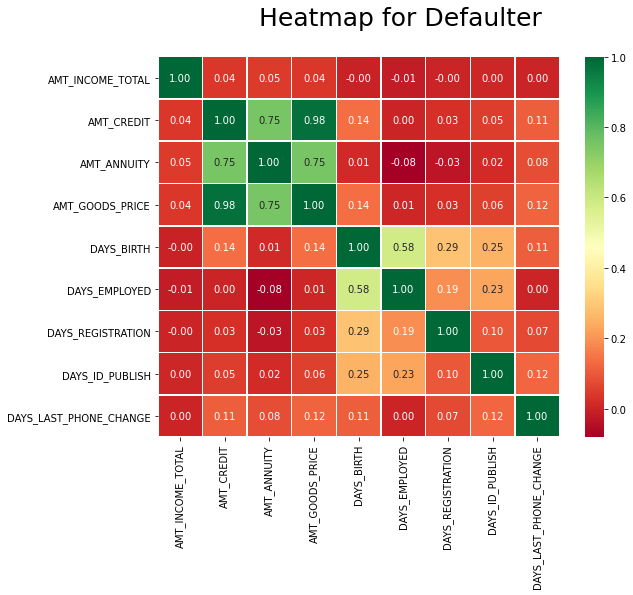

In [81]:
# Heatmap for defaulters
corr_d = defaulter[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr_d,annot=True,fmt='.2f',cmap="RdYlGn", linewidth=0.5)
plt.suptitle("Heatmap for Defaulter\n", fontsize= 25, fontweight = 5, color = 'Black')
plt.show()

## Top 10 Correlation for repayer clients (no payment difficulties)

In [82]:
corr_r = repayer[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].corr()
corr_r=corr_r.where(np.triu(np.ones(corr_r.shape),k=1).astype(np.bool))
corr_r_df=corr_r.unstack().reset_index()
corr_r_df.columns = ['Var1', 'Var2', 'Correlation']
corr_r_df.dropna(subset = ['Correlation'], inplace = True)
corr_r_df['Correlation'] = round(corr_r_df['Correlation'], 2)
corr_r_df['Correlation'] = abs(corr_r_df['Correlation'])
corr_r_df.sort_values(by = 'Correlation', ascending = False).head(10)

Var1              Var2  Correlation
28    AMT_GOODS_PRICE        AMT_CREDIT         0.99
29    AMT_GOODS_PRICE       AMT_ANNUITY         0.78
19        AMT_ANNUITY        AMT_CREDIT         0.77
49      DAYS_EMPLOYED        DAYS_BIRTH         0.63
18        AMT_ANNUITY  AMT_INCOME_TOTAL         0.42
27    AMT_GOODS_PRICE  AMT_INCOME_TOTAL         0.35
9          AMT_CREDIT  AMT_INCOME_TOTAL         0.34
58  DAYS_REGISTRATION        DAYS_BIRTH         0.33
68    DAYS_ID_PUBLISH     DAYS_EMPLOYED         0.28
67    DAYS_ID_PUBLISH        DAYS_BIRTH         0.27

## Top 10 Correlation for defaulter clients (with payment difficulties)

In [83]:
corr_d = defaulter[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].corr()
corr_d=corr_d.where(np.triu(np.ones(corr_r.shape),k=1).astype(np.bool))
corr_d_df=corr_d.unstack().reset_index()
corr_d_df.columns = ['Var1', 'Var2', 'Correlation']
corr_d_df.dropna(subset = ['Correlation'], inplace = True)
corr_d_df['Correlation'] = round(corr_d_df['Correlation'], 2)
corr_d_df['Correlation'] = abs(corr_d_df['Correlation'])
corr_d_df.sort_values(by = 'Correlation', ascending = False).head(10)

Var1             Var2  Correlation
28    AMT_GOODS_PRICE       AMT_CREDIT         0.98
19        AMT_ANNUITY       AMT_CREDIT         0.75
29    AMT_GOODS_PRICE      AMT_ANNUITY         0.75
49      DAYS_EMPLOYED       DAYS_BIRTH         0.58
58  DAYS_REGISTRATION       DAYS_BIRTH         0.29
67    DAYS_ID_PUBLISH       DAYS_BIRTH         0.25
68    DAYS_ID_PUBLISH    DAYS_EMPLOYED         0.23
59  DAYS_REGISTRATION    DAYS_EMPLOYED         0.19
37         DAYS_BIRTH       AMT_CREDIT         0.14
39         DAYS_BIRTH  AMT_GOODS_PRICE         0.14

- **Inference 1** : *Amount Annuity, Amount Credit and Amount Goods Price are more correlated to Amount Total Income among repayers compared to defaulters.* 

# PREVIOUS APPLICATION

<div class="alert alert-block alert-info">
<h1><b> Loading Dataset</b></h1>
</div>

In [84]:
# Loading previous application

Prev_appl = pd.read_csv("previous_application.csv")
Prev_appl.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

<div class="alert alert-block alert-info">
<h1><b> Dataframe Inspection</b></h1>
</div>

In [85]:
# shape of previous application
Prev_appl.shape

(1670214, 37)

In [86]:
# Info of previous application
Prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [87]:
# Percentage of null values in previous application
Prev_appl.isnull().sum()*100/Prev_appl.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [88]:
# Description of numeric columns
Prev_appl.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

<div class="alert alert-block alert-info">
<h1><b> Data Cleaning</b></h1>
</div>

### Remove columns with missing values more than 50%

In [89]:
# Drop columns with missing values more than 50% and check shape
Prev_appl.drop(Prev_appl.columns[Prev_appl.isnull().sum()*100/Prev_appl.shape[0]>50], axis=1,inplace=True)
Prev_appl.shape

(1670214, 33)

In [90]:
# Percentage of null values
Prev_appl.isnull().sum()*100/Prev_appl.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

## Imputing null values and change the datatype in correct format

In [91]:
# value counts for NAME_CLIENT_TYPE

Prev_appl["NAME_CLIENT_TYPE"].value_counts(normalize=True)*100

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

In [92]:
# There is .116% XNA in NAME_CLIENT_TYPE, which means not available for the column. We can replace it with mode value.

Prev_appl["NAME_CLIENT_TYPE"]=Prev_appl["NAME_CLIENT_TYPE"].replace("XNA",Prev_appl["NAME_CLIENT_TYPE"].mode()[0])
Prev_appl["NAME_CLIENT_TYPE"].value_counts(normalize=True)*100

Repeater     73.834970
New          18.043376
Refreshed     8.121654
Name: NAME_CLIENT_TYPE, dtype: float64

In [93]:
# value counts for NAME_PAYMENT_TYPE
Prev_appl["NAME_PAYMENT_TYPE"].value_counts(normalize=True)*100

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

In [94]:
# As the percentage of "XNA" is very high and XNA means reason not available, we will replace it with NaN

Prev_appl["NAME_PAYMENT_TYPE"].replace("XNA",np.NaN,inplace=True)
Prev_appl["NAME_PAYMENT_TYPE"].value_counts(normalize=True)

Cash through the bank                        0.991103
Non-cash from your account                   0.007857
Cashless from the account of the employer    0.001040
Name: NAME_PAYMENT_TYPE, dtype: float64

In [95]:
# value counts for NAME_CONTRACT_TYPE
Prev_appl["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [96]:
# Replace "XNA" values with mode value in NAME_CONTRACT_TYPE

Prev_appl["NAME_CONTRACT_TYPE"].replace("XNA",Prev_appl["NAME_CONTRACT_TYPE"].mode()[0],inplace=True)
Prev_appl["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [97]:
# It does not seem to be safe to impute 'XNA' the NAME_GOODS_CATEGORY variable as they are major percentage of values in that variable. Imputing them might lead to inaccurate inferences.
Prev_appl["NAME_GOODS_CATEGORY"].value_counts(normalize=True)*100

XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                    0.003832
House Constr

In [98]:
# It does not seem to be safe to impute 'XNA' & 'XAP' values in the NAME_CASH_LOAN_PURPOSE variable as they are major percentage of values in that variable. Imputing them might lead to inaccurate inferences.
Prev_appl.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [99]:
# Change NFLAG_INSURED_ON_APPROVAL from float to integer type

Prev_appl.NFLAG_INSURED_ON_APPROVAL = pd.to_numeric(Prev_appl.NFLAG_INSURED_ON_APPROVAL, errors='coerce').astype(pd.Int64Dtype())

### Converting negative values for days to absolute value and convert it to years

In [100]:
# Converting negative values for days to absolute value and convert into years by dividing it with 365 for better analysis.

Days= [i for i in Prev_appl if "DAYS" in i]
Prev_appl[Days] = abs(Prev_appl[Days])
for i in Days:
    Prev_appl[i] = pd.to_numeric(Prev_appl[i], errors='coerce').astype(pd.Int64Dtype())
Prev_appl[Days]=Prev_appl[Days]/365

In [101]:
Prev_appl[Days].head()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0       0.200000         1000.665753        0.115068   
1       0.449315         1000.665753        0.367123   
2       0.824658         1000.665753        0.742466   
3       1.402740         1000.665753        1.320548   
4       2.139726                 NaN             NaN   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
0                   0.821918       0.115068          0.101370  
1                   2.509589    1000.665753       1000.665753  
2                   0.161644    1000.665753       1000.665753  
3                   0.416438       0.498630          0.484932  
4                        NaN            NaN               NaN

<div class="alert alert-block alert-info">
<h1><b> Univariate Analysis</b></h1>
</div>

# Univariate on Numerical variables

#### AMT_ANNUITY

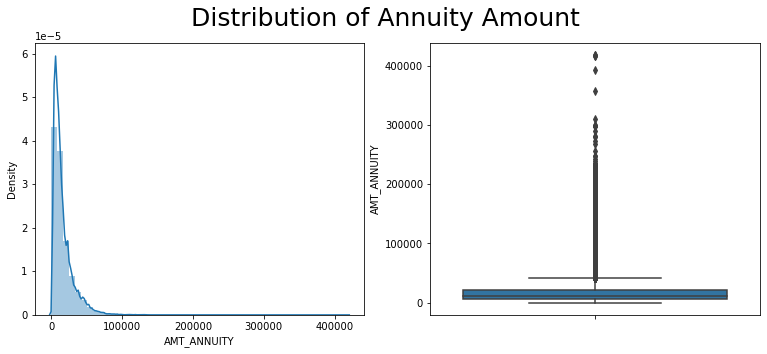

In [102]:
# AMT_ANNUITY
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Annuity Amount", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(121)
sns.distplot(Prev_appl["AMT_ANNUITY"])
plt.subplot(122)
sns.boxplot(y=Prev_appl["AMT_ANNUITY"])
plt.show()

- **Inference 1**: *Some outliers have been observed around 400000 and graph is skewed*

In [104]:
# Outlier Detection using Q3+3*IQR
Prev_appl.AMT_ANNUITY.quantile(0.75)+3*(Prev_appl.AMT_ANNUITY.quantile(0.75)-Prev_appl.AMT_ANNUITY.quantile(0.25))

63668.34

In [105]:
# Applicants with maximum annuity amount
Prev_appl[Prev_appl.AMT_ANNUITY==Prev_appl.AMT_ANNUITY.max()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
516560     2501351      238970         Cash loans   418058.145   
911948     1225459      365299         Cash loans   418058.145   

        AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
516560        2250000.0   2369070.0        2250000.0   
911948        2250000.0   2369070.0        2250000.0   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
516560                     FRIDAY                       11   
911948                     MONDAY                       10   

       FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
516560                           Y                       1   
911948                           Y                       1   

       NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
516560                Repairs              Refused       3.832877   
911948                Repairs              Refused       4.257534   

            NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
516560  Cash through the bank                 HC   Unaccompanied   
911948  Cash through the bank                 HC   Unaccompanied   

       NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
516560         Repeater                 XNA           Cash           walk-in   
911948         Repeater                 XNA           Cash           walk-in   

                   CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
516560  Credit and cash offices                -1                  XNA   
911948  Credit and cash offices                -1                  XNA   

        CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
516560          6.0       low_action    Cash Street: low                 NaN   
911948          6.0       low_action    Cash Street: low                 NaN   

        DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
516560             NaN                        NaN            NaN   
911948             NaN                        NaN            NaN   

        DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
516560               NaN                       <NA>  
911948               NaN                       <NA>

#### AMT_APPLICATION

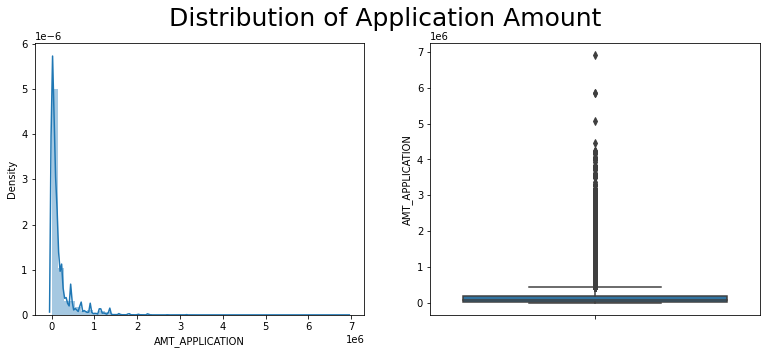

In [106]:
# AMT_APPLICATION
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Application Amount", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(121)
sns.distplot(Prev_appl["AMT_APPLICATION"])
plt.subplot(122)
sns.boxplot(y=Prev_appl["AMT_APPLICATION"])
plt.show()

- **Inference 1**: *Some outliers have been observed above 665280 and graph is skewed*

In [107]:
# Outlier Detection using Q3+3*IQR
Prev_appl.AMT_APPLICATION.quantile(0.75)+3*(Prev_appl.AMT_APPLICATION.quantile(0.75)-Prev_appl.AMT_APPLICATION.quantile(0.25))

665280.0

#### AMT_CREDIT

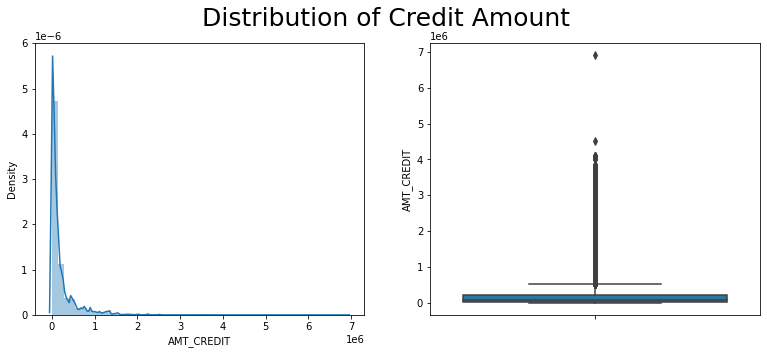

In [108]:
# AMT_CREDIT
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Credit Amount", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(121)
sns.distplot(Prev_appl["AMT_CREDIT"])
plt.subplot(122)
sns.boxplot(y=Prev_appl["AMT_CREDIT"])
plt.show()

- **Inference 1**: *Some outliers have been observed around 700000 and graph is skewed*

In [109]:
# Outlier Detection using Q3+3*IQR
Prev_appl.AMT_CREDIT.quantile(0.75)+3*(Prev_appl.AMT_CREDIT.quantile(0.75)-Prev_appl.AMT_CREDIT.quantile(0.25))

793192.5

##### AMT_GOODS_PRICE

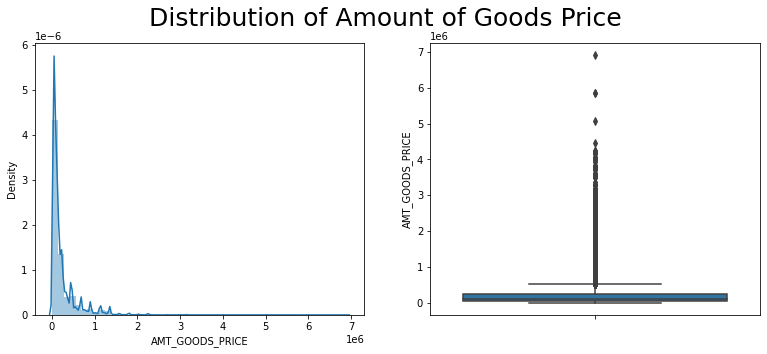

In [110]:
# AMT_GOODS_PRICE
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Amount of Goods Price", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(121)
sns.distplot(Prev_appl["AMT_GOODS_PRICE"])
plt.subplot(122)
sns.boxplot(y=Prev_appl["AMT_GOODS_PRICE"])
plt.show()

- **Inference 1**: *Some outliers have been observed and graph is skewed*

#### CNT_PAYMENT

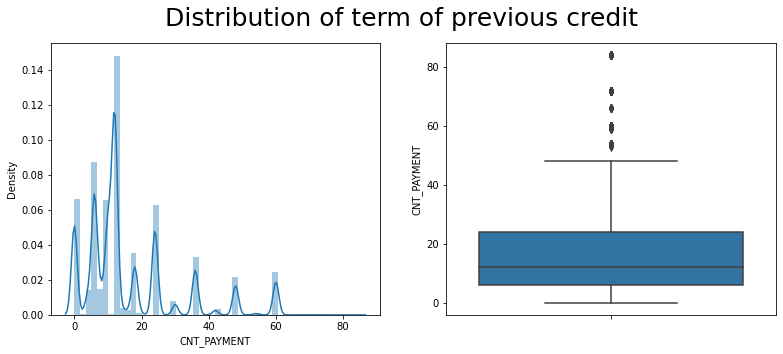

In [111]:
# CNT_PAYMENT
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of term of previous credit\n", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
sns.distplot(Prev_appl["CNT_PAYMENT"])
plt.subplot(122)
sns.boxplot(y=Prev_appl["CNT_PAYMENT"])
plt.show()

- **Inference 1**: *Some outliers have been observed around 80 and distribution is uneven*

In [112]:
# Outlier Detection using Q3+3*IQR
Prev_appl.CNT_PAYMENT.quantile(0.75)+3*(Prev_appl.CNT_PAYMENT.quantile(0.75)-Prev_appl.CNT_PAYMENT.quantile(0.25))

78.0

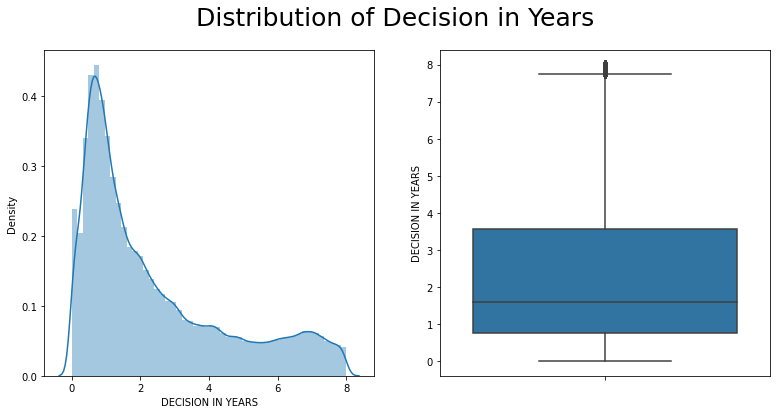

In [113]:
# DECISION IN YEARS
plt.figure(figsize=(13,6))
plt.suptitle("Distribution of Decision in Years\n", fontsize= 25, fontweight = 5, color = 'Black')
plt.subplot(121)
sns.distplot(Prev_appl["DAYS_DECISION"])
plt.xlabel("DECISION IN YEARS")
plt.subplot(122)
sns.boxplot(y=Prev_appl["DAYS_DECISION"])
plt.ylabel("DECISION IN YEARS")
plt.show()

- **Inference 1**: *The graph is skewed*

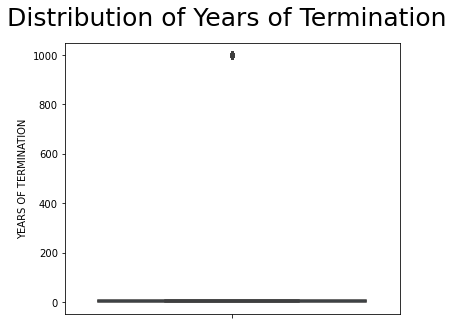

In [114]:
# YEARS OF TERMINATION
plt.figure(figsize=(6,5))
plt.suptitle("Distribution of Years of Termination\n", fontsize= 25, fontweight = 5, color = 'Black')
sns.boxplot(y=Prev_appl["DAYS_TERMINATION"])
plt.ylabel("YEARS OF TERMINATION")
plt.show()

- **Inference 1**: *Outlier is having value more than 1000 year, which is unrealistic*

In [115]:
# maximum years of termination which is 1000 years
Prev_appl["DAYS_TERMINATION"].max()/365

2.7415500093826233

# Univariate Analysis on Categorical variables

#### NAME_CONTRACT_TYPE

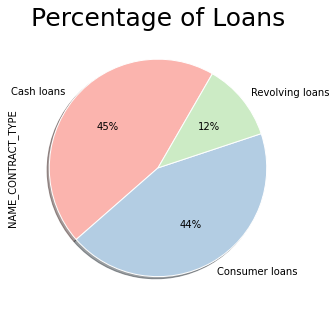

In [116]:
# NAME_CONTRACT_TYPE
plt.figure(figsize=(7,5))
Prev_appl["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 60, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
plt.title("Percentage of Loans",fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference 1**: *More people applied for cash and consumer loans in previous application*

#### NAME_CONTRACT_STATUS

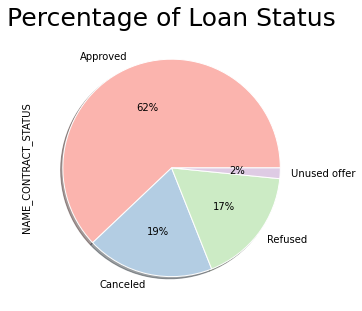

In [117]:
# NAME_CONTRACT_STATUS
plt.figure(figsize=(7,5))
Prev_appl["NAME_CONTRACT_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
plt.title("Percentage of Loan Status",fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference 1**: *Percentage of approved contract status is highest in previous application*

#### NAME_PAYMENT_TYPE

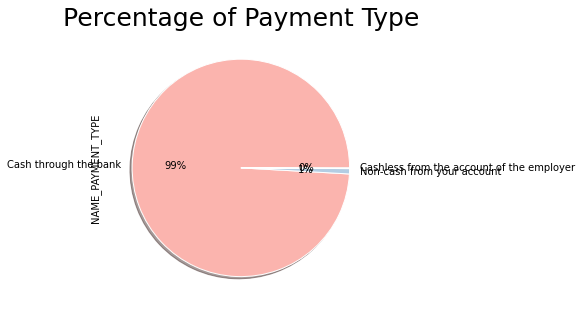

In [118]:
# NAME_PAYMENT_TYPE
plt.figure(figsize=(7,5))
Prev_appl["NAME_PAYMENT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
plt.title("Percentage of Payment Type",fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference 1**: *Most of the people chose to pay cash through bank in previous application*

#### NAME_CLIENT_TYPE

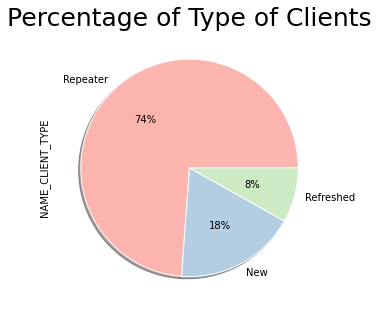

In [119]:
# NAME_CLIENT_TYPE
plt.figure(figsize=(7,5))
Prev_appl["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Pastel1"),startangle = 0, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
plt.title("Percentage of Type of Clients",fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference 1**: *Percentage of repeater are very high.*

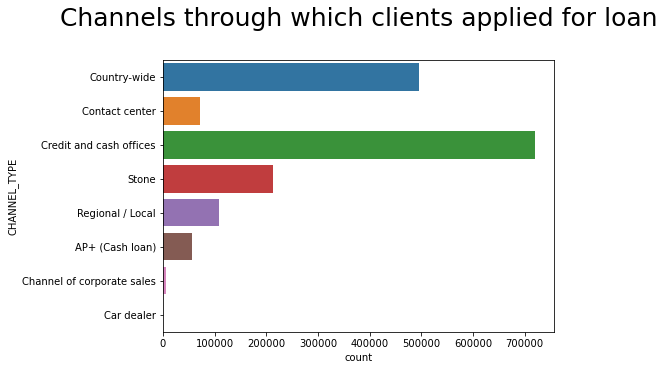

In [120]:
# Distribution of Channels
plt.figure(figsize=(7,5))
sns.countplot(y=Prev_appl["CHANNEL_TYPE"])
plt.title("Channels through which clients applied for loan\n",fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference 1**: *Large number of people were from Credit and cash offices channel type.*
- **Inference 2**: *Least number of people were from car dealer channel type.*

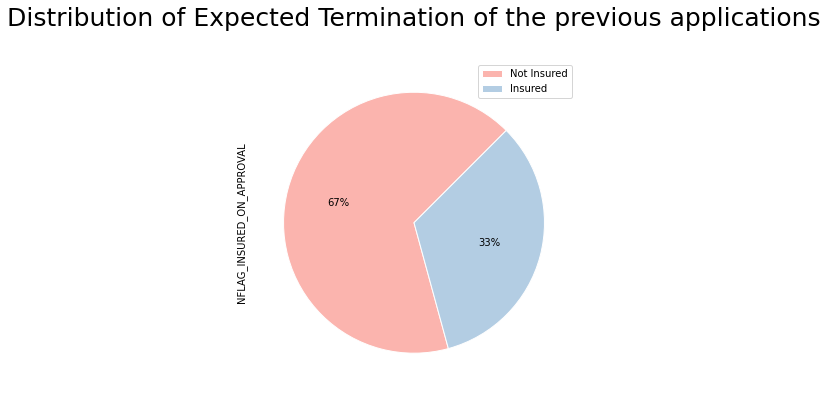

In [121]:
# Distribution of Expected Termination
plt.figure(figsize=[8,6])

Prev_appl['NFLAG_INSURED_ON_APPROVAL'].replace({0.0: 'Not Insured', 1.0:  'Insured' }, inplace=True)
NFLAG_INSURED_ON_APPROVAL_labels = Prev_appl.NFLAG_INSURED_ON_APPROVAL.value_counts().index
Prev_appl.NFLAG_INSURED_ON_APPROVAL.value_counts().plot.pie(autopct='%1.0f%%', labels=None, colors = sns.color_palette("Pastel1"),startangle = 45, wedgeprops={"linewidth":1,"edgecolor":"white"})
plt.legend(NFLAG_INSURED_ON_APPROVAL_labels)
plt.title('Distribution of Expected Termination of the previous applications\n', fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'});
plt.show()

- **Inference**: *Major percent of the previous applications were not insured.*

<div class="alert alert-block alert-info">
<h1><b> Bivariate Analysis</b></h1>
</div>

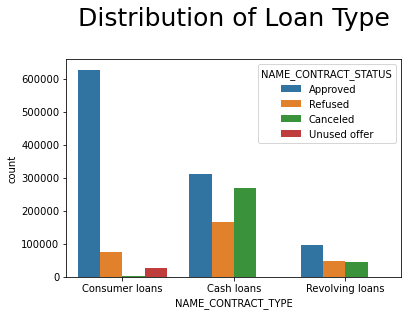

In [122]:
# Distribution of Loan Type
sns.countplot(data=Prev_appl,x="NAME_CONTRACT_TYPE",hue="NAME_CONTRACT_STATUS")
plt.title("Distribution of Loan Type\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})
plt.show()

- **Inference 1**: *Consumer loans were approved more in comparison to other loan type.*
- **Inference 2**: *Most cancelled loans were cash loans.*

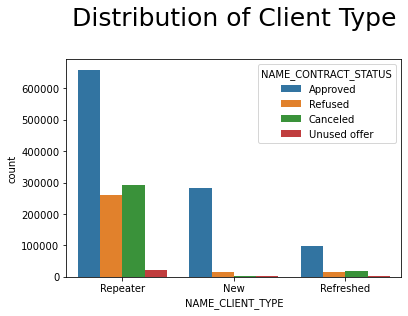

In [123]:
# Distribution of Client Type
sns.countplot(data=Prev_appl,x="NAME_CLIENT_TYPE",hue="NAME_CONTRACT_STATUS")
plt.title("Distribution of Client Type\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})

plt.show()

- **Inference 1**: *Loans for repeater type clients were approved more than refresh or new clients.*
- **Inference 2**: *Also more repeaters were under refused and cancelled status in previous application.*

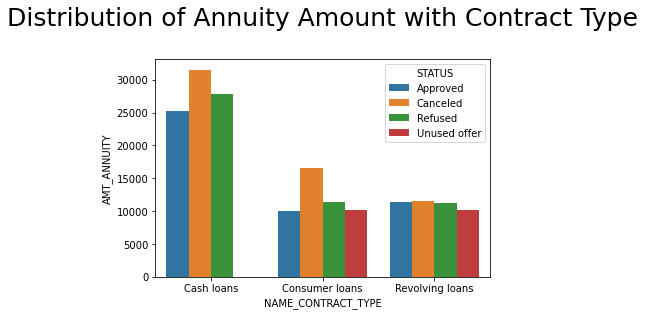

In [124]:
# Distribution of Annuity Amount with Contract Type

df = Prev_appl.pivot_table(index="NAME_CONTRACT_TYPE",values="AMT_ANNUITY",columns="NAME_CONTRACT_STATUS")

df_a = df.loc[df.index,["Approved"]]
df_a = df_a.rename(columns={ 'Approved':"AMT_ANNUITY"})
df_a["STATUS"] = "Approved"

df_c = df.loc[df.index,["Canceled"]]
df_c = df_c.rename(columns={ 'Canceled':"AMT_ANNUITY"})
df_c["STATUS"] = "Canceled"

df_r = df.loc[df.index,["Refused"]]
df_r = df_r.rename(columns={'Refused':"AMT_ANNUITY"})
df_r["STATUS"] = "Refused"

df_u = df.loc[df.index,["Unused offer"]]
df_u = df_u.rename(columns={'Unused offer':"AMT_ANNUITY"})
df_u["STATUS"] = "Unused offer"

df_g = pd.concat([df_a,df_c,df_r,df_u],axis=0).fillna(0)
df_g

sns.barplot(x=df_g.index,y=df_g.AMT_ANNUITY,hue=df_g.STATUS)
plt.title("Distribution of Annuity Amount with Contract Type\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})

plt.show()

- **Inference 1**: *Cash loans with high annuity amount were mostly cancelled.*

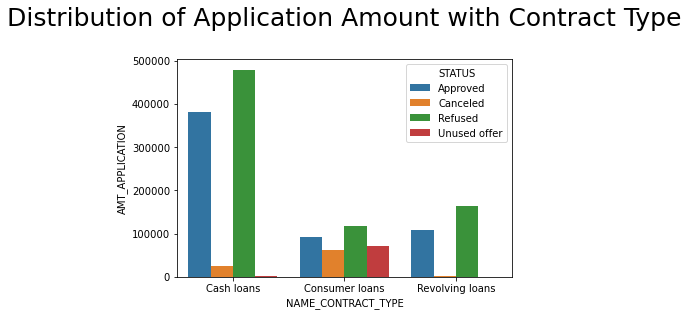

In [125]:
# Distribution of Application Amount with Contract Type

df = Prev_appl.pivot_table(index="NAME_CONTRACT_TYPE",values="AMT_APPLICATION",columns="NAME_CONTRACT_STATUS")

df_a = df.loc[df.index,["Approved"]]
df_a = df_a.rename(columns={ 'Approved':"AMT_APPLICATION"})
df_a["STATUS"] = "Approved"

df_c = df.loc[df.index,["Canceled"]]
df_c = df_c.rename(columns={ 'Canceled':"AMT_APPLICATION"})
df_c["STATUS"] = "Canceled"

df_r = df.loc[df.index,["Refused"]]
df_r = df_r.rename(columns={'Refused':"AMT_APPLICATION"})
df_r["STATUS"] = "Refused"

df_u = df.loc[df.index,["Unused offer"]]
df_u = df_u.rename(columns={'Unused offer':"AMT_APPLICATION"})
df_u["STATUS"] = "Unused offer"

df_g = pd.concat([df_a,df_c,df_r,df_u],axis=0).fillna(0)
df_g

sns.barplot(x=df_g.index,y=df_g.AMT_APPLICATION,hue=df_g.STATUS)
plt.title("Distribution of Application Amount with Contract Type\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})

plt.show()

- **Inference 1**: *Cash loans with high application amount were mostly refused.*

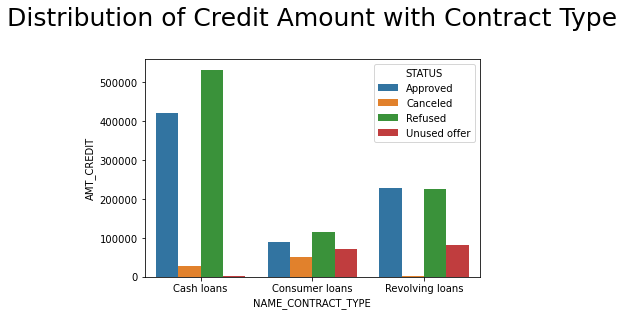

In [126]:
# Distribution of Credit Amount with Contract Type

df = Prev_appl.pivot_table(index="NAME_CONTRACT_TYPE",values="AMT_CREDIT",columns="NAME_CONTRACT_STATUS")

df_a = df.loc[df.index,["Approved"]]
df_a = df_a.rename(columns={ 'Approved':"AMT_CREDIT"})
df_a["STATUS"] = "Approved"

df_c = df.loc[df.index,["Canceled"]]
df_c = df_c.rename(columns={ 'Canceled':"AMT_CREDIT"})
df_c["STATUS"] = "Canceled"

df_r = df.loc[df.index,["Refused"]]
df_r = df_r.rename(columns={'Refused':"AMT_CREDIT"})
df_r["STATUS"] = "Refused"

df_u = df.loc[df.index,["Unused offer"]]
df_u = df_u.rename(columns={'Unused offer':"AMT_CREDIT"})
df_u["STATUS"] = "Unused offer"

df_g = pd.concat([df_a,df_c,df_r,df_u],axis=0).fillna(0)
df_g

sns.barplot(x=df_g.index,y=df_g.AMT_CREDIT,hue=df_g.STATUS)
plt.title("Distribution of Credit Amount with Contract Type\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})

plt.show()

- **Inference 1**: *Cash loans with high amount credit in previous application were mostly refused.*

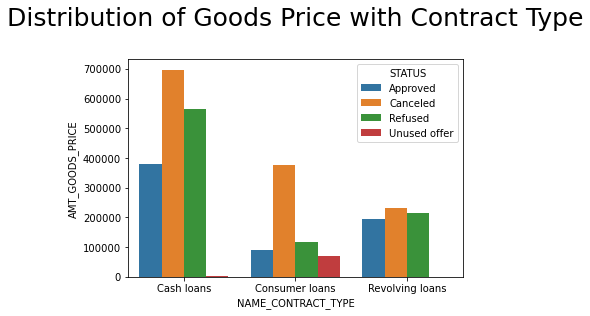

In [127]:
# Distribution of Goods Price with Contract Type

df = Prev_appl.pivot_table(index="NAME_CONTRACT_TYPE",values="AMT_GOODS_PRICE",columns="NAME_CONTRACT_STATUS")

df_a = df.loc[df.index,["Approved"]]
df_a = df_a.rename(columns={ 'Approved':"AMT_GOODS_PRICE"})
df_a["STATUS"] = "Approved"

df_c = df.loc[df.index,["Canceled"]]
df_c = df_c.rename(columns={ 'Canceled':"AMT_GOODS_PRICE"})
df_c["STATUS"] = "Canceled"

df_r = df.loc[df.index,["Refused"]]
df_r = df_r.rename(columns={'Refused':"AMT_GOODS_PRICE"})
df_r["STATUS"] = "Refused"

df_u = df.loc[df.index,["Unused offer"]]
df_u = df_u.rename(columns={'Unused offer':"AMT_GOODS_PRICE"})
df_u["STATUS"] = "Unused offer"

df_g = pd.concat([df_a,df_c,df_r,df_u],axis=0).fillna(0)
df_g

sns.barplot(x=df_g.index,y=df_g.AMT_GOODS_PRICE,hue=df_g.STATUS)
plt.title("Distribution of Goods Price with Contract Type\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})

plt.show()

- **Inference 1**: *Cash loans with high amount goods price were either cancelled or refused in previous application.*

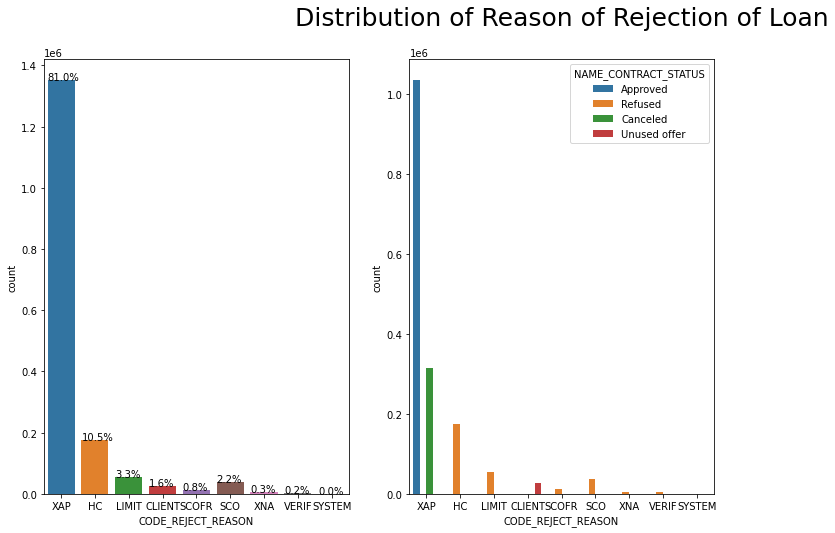

In [128]:
# Distribution of Reason of Rejection of Loan with contract status

plt.figure(figsize=(12,8))
plt.subplot(121)
ax=sns.countplot(Prev_appl["CODE_REJECT_REASON"])
total = len(Prev_appl["CODE_REJECT_REASON"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2-.4
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 10)
plt.subplot(122)  
sns.countplot(Prev_appl["CODE_REJECT_REASON"],hue=Prev_appl["NAME_CONTRACT_STATUS"])
plt.title("Distribution of Reason of Rejection of Loan\n", fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'})

plt.show()

- **Inference 1**: *We can observe that loan with rejection reason "XAP", which is highest and unknown reason, were actually approved in previous application.*

<div class="alert alert-block alert-info">
<h1><b> Merging Datasets</b></h1>
</div>

In [129]:
# Map the TARGET variable from application data set with the Previous Application data set using 'SK_ID_CURR' as the key.

New_DF = Appl_data[['SK_ID_CURR','TARGET']]
Applicant = New_DF.merge(Prev_appl, on='SK_ID_CURR')
Applicant.head()

SK_ID_CURR     TARGET  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0      100002  Defaulter     1038818     Consumer loans     9251.775   
1      100003    Repayer     1810518         Cash loans    98356.995   
2      100003    Repayer     2636178     Consumer loans    64567.665   
3      100003    Repayer     2396755     Consumer loans     6737.310   
4      100004    Repayer     1564014     Consumer loans     5357.250   

   AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0         179055.0    179055.0         179055.0                   SATURDAY   
1         900000.0   1035882.0         900000.0                     FRIDAY   
2         337500.0    348637.5         337500.0                     SUNDAY   
3          68809.5     68053.5          68809.5                   SATURDAY   
4          24282.0     20106.0          24282.0                     FRIDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                        9                           Y   
1                       12                           Y   
2                       17                           Y   
3                       15                           Y   
4                        5                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XAP             Approved   
3                       1                    XAP             Approved   
4                       1                    XAP             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
0       1.660274                    NaN                XAP             NaN   
1       2.043836                    NaN                XAP   Unaccompanied   
2       2.268493  Cash through the bank                XAP          Family   
3       6.413699  Cash through the bank                XAP          Family   
4       2.232877  Cash through the bank                XAP   Unaccompanied   

  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              New              Vehicles            POS               XNA   
1         Repeater                   XNA           Cash            x-sell   
2        Refreshed             Furniture            POS               XNA   
3        Refreshed  Consumer Electronics            POS               XNA   
4              New                Mobile            POS               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
0                    Stone               500       Auto technology   
1  Credit and cash offices                -1                   XNA   
2                    Stone              1400             Furniture   
3             Country-wide               200  Consumer electronics   
4         Regional / Local                30          Connectivity   

   CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  \
0         24.0       low_normal      POS other with interest   
1         12.0       low_normal             Cash X-Sell: low   
2          6.0           middle   POS industry with interest   
3         12.0           middle  POS household with interest   
4          4.0           middle  POS mobile without interest   

   DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
0         1000.665753        1.547945                   0.342466   
1         1000.665753        1.961644                   1.057534   
2         1000.665753        2.183562                   1.772603   
3         1000.665753        6.328767                   5.424658   
4         1000.665753        2.147945                   1.901370   

   DAYS_LAST_DUE  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0       0.068493          0.046575               Not Insured  
1       1.468493          1.443836      

## PERCENTAGE OF TARGET VARIABLE 

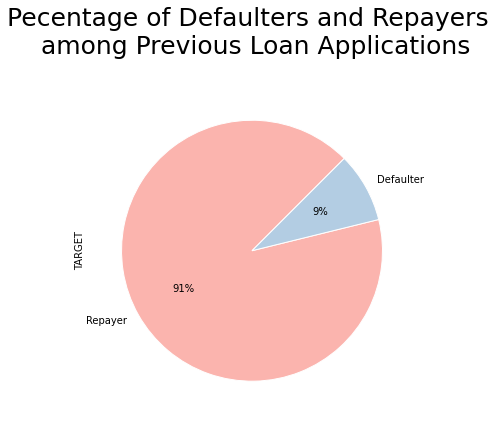

In [130]:
# Pecentage of Defaulters and Repayers

plt.figure(figsize=(8,6))
round(Applicant.TARGET.value_counts(dropna=False)/Applicant.TARGET.value_counts().sum()*100,0)
Applicant.TARGET.value_counts().plot.pie(autopct="%1.0f%%", colors = sns.color_palette("Pastel1"),startangle = 45, wedgeprops={"linewidth":1,"edgecolor":"white"})
plt.title('Pecentage of Defaulters and Repayers \n among Previous Loan Applications\n', fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'});

- **Inference**: Among the previous applications, majority of the applicants are current Repayers.

<div class="alert alert-block alert-info">
<h1><b> Merged Data Analysis</b></h1>
</div>

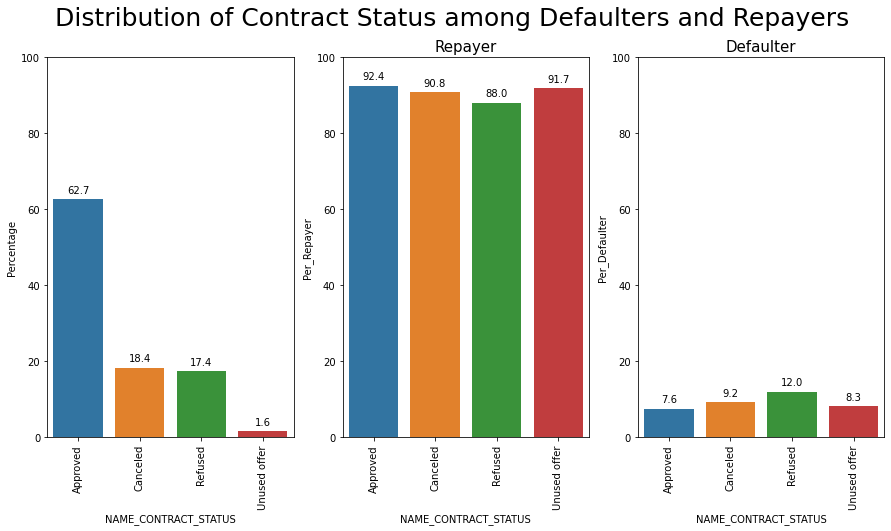

In [131]:
# Distribution of Contract Status among Defaulters and Repayers

NAME_CONTRACT_STATUS = Applicant.groupby(['NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].apply(lambda p: p.count()*100/Applicant['NAME_CONTRACT_STATUS'].count())

df=Applicant.groupby(['NAME_CONTRACT_STATUS',"TARGET"])['NAME_CONTRACT_STATUS'].apply(lambda p: p.count())
df = df.unstack()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,7))
plt.suptitle("Distribution of Contract Status among Defaulters and Repayers", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(131)
ax=sns.barplot(NAME_CONTRACT_STATUS.index,NAME_CONTRACT_STATUS.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.index,df["Per_Repayer"])
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.subplot(133)
ax1=sns.barplot(df.index,df["Per_Defaulter"])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100);

- **Inference 1**: *Out of 62.7% previously approved applications, 7.6% are current defaulters, which is low compared to other defaulters.*
- **Inference 2**: *Maximum percentage of previous application 'Refused' status are current defaulters.*

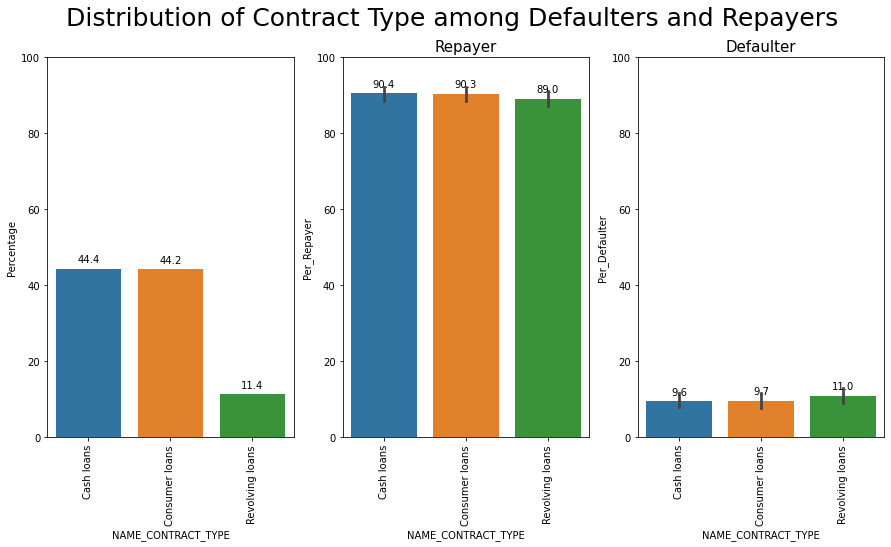

In [132]:
# Distribution of Contract Type among Defaulters and Repayers

NAME_CONTRACT_TYPE = Applicant.groupby(['NAME_CONTRACT_TYPE'])['NAME_CONTRACT_TYPE'].apply(lambda p: p.count()*100/Applicant['NAME_CONTRACT_TYPE'].count())

df=Applicant.groupby(['NAME_CONTRACT_TYPE',"NAME_CONTRACT_STATUS","TARGET"])['NAME_CONTRACT_TYPE'].apply(lambda p: p.count())
df = df.unstack().reset_index()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,7))
plt.suptitle("Distribution of Contract Type among Defaulters and Repayers\n", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(131)
ax=sns.barplot(NAME_CONTRACT_TYPE.index,NAME_CONTRACT_TYPE.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.NAME_CONTRACT_TYPE,df["Per_Repayer"])
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
    
plt.subplot(133)
ax1=sns.barplot(df.NAME_CONTRACT_TYPE,df["Per_Defaulter"])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100);

- **Inference** : *Applicants with revolving loans were very less in previous applications but maximum percentage of defaulters.*

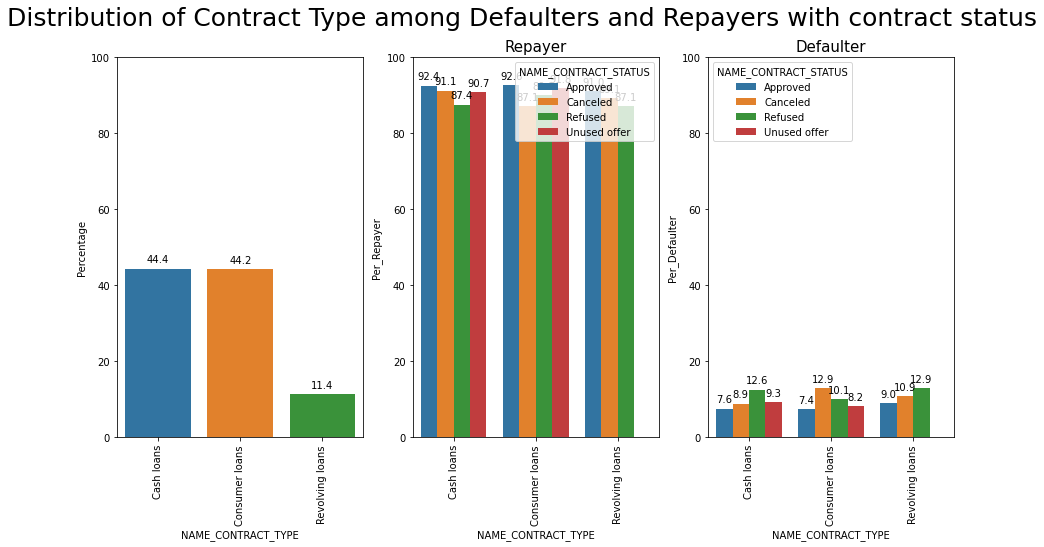

In [133]:
# Distribution of Contract Type among Defaulters and Repayers with contract status

NAME_CONTRACT_TYPE = Applicant.groupby(['NAME_CONTRACT_TYPE'])['NAME_CONTRACT_TYPE'].apply(lambda p: p.count()*100/Applicant['NAME_CONTRACT_TYPE'].count())

df=Applicant.groupby(['NAME_CONTRACT_TYPE',"NAME_CONTRACT_STATUS","TARGET"])['NAME_CONTRACT_TYPE'].apply(lambda p: p.count())
df = df.unstack().reset_index()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,7))
plt.suptitle("Distribution of Contract Type among Defaulters and Repayers with contract status\n", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(131)
ax=sns.barplot(NAME_CONTRACT_TYPE.index,NAME_CONTRACT_TYPE.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.NAME_CONTRACT_TYPE,df["Per_Repayer"],hue=df.NAME_CONTRACT_STATUS)
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)
    
plt.subplot(133)
ax1=sns.barplot(df.NAME_CONTRACT_TYPE,df["Per_Defaulter"],hue=df.NAME_CONTRACT_STATUS)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100);

- **Inference 1**: *Applicants with cash loans has high percentage (91.1%) of repayers, but were canceled in previous application.*
- **Inference 2**: *Applicants with revolving loans were very less in previous applications but maximum percentage of defaulters.*

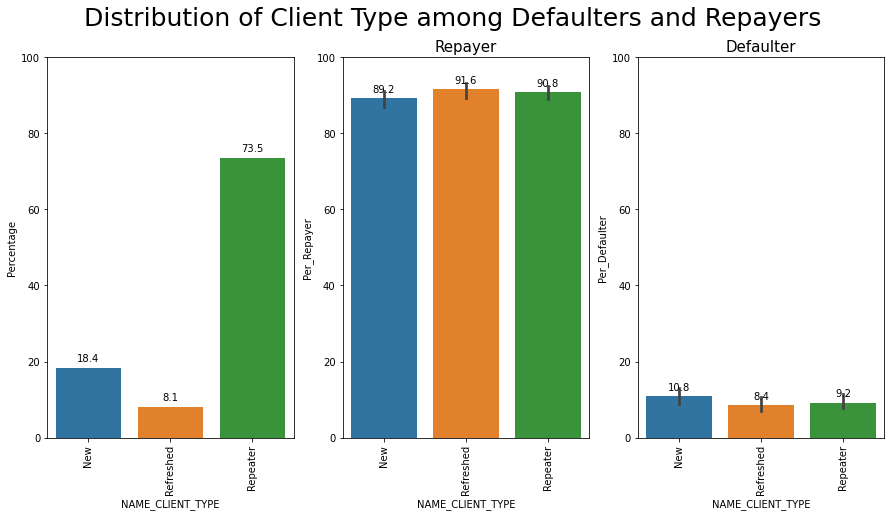

In [134]:
# Distribution of Client Type among Defaulters and Repayers

NAME_CLIENT_TYPE = Applicant.groupby(['NAME_CLIENT_TYPE'])['NAME_CLIENT_TYPE'].apply(lambda p: p.count()*100/Applicant['NAME_CLIENT_TYPE'].count())

df=Applicant.groupby(['NAME_CLIENT_TYPE',"NAME_CONTRACT_STATUS","TARGET"])['NAME_CLIENT_TYPE'].apply(lambda p: p.count())
df = df.unstack().reset_index()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,7))
plt.suptitle("Distribution of Client Type among Defaulters and Repayers\n", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(131)
ax=sns.barplot(NAME_CLIENT_TYPE.index,NAME_CLIENT_TYPE.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.NAME_CLIENT_TYPE,df["Per_Repayer"])
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.subplot(133)
ax1=sns.barplot(df.NAME_CLIENT_TYPE,df["Per_Defaulter"])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100);

- **Inference** : *People who were "NEW" in client type in previous application has maximum percentage of defaulters.*
- **Inference** : *Percentage of people of client type "Refreshed" were least, but are maximum repayers in current application.*

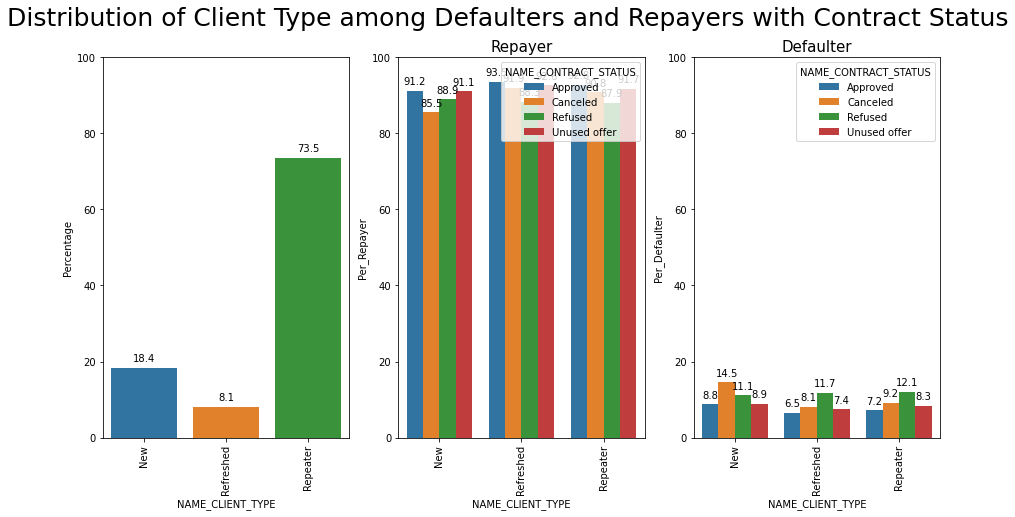

In [135]:
# Distribution of Client Type among Defaulters and Repayers with Contract Status

NAME_CLIENT_TYPE = Applicant.groupby(['NAME_CLIENT_TYPE'])['NAME_CLIENT_TYPE'].apply(lambda p: p.count()*100/Applicant['NAME_CLIENT_TYPE'].count())

df=Applicant.groupby(['NAME_CLIENT_TYPE',"NAME_CONTRACT_STATUS","TARGET"])['NAME_CLIENT_TYPE'].apply(lambda p: p.count())
df = df.unstack().reset_index()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,7))
plt.suptitle("Distribution of Client Type among Defaulters and Repayers with Contract Status\n", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(131)
ax=sns.barplot(NAME_CLIENT_TYPE.index,NAME_CLIENT_TYPE.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.ylim(0,100)

plt.subplot(132)
ax0=sns.barplot(df.NAME_CLIENT_TYPE,df["Per_Repayer"],hue=df.NAME_CONTRACT_STATUS)
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.subplot(133)
ax1=sns.barplot(df.NAME_CLIENT_TYPE,df["Per_Defaulter"],hue=df.NAME_CONTRACT_STATUS)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100);

- **Inference 1**: *Most of the people were repeaters and there is very less percentage of refreshed contract type.*
- **Inference 2**: *Highest percentage were from cancelled contract type that are current defaulters.*

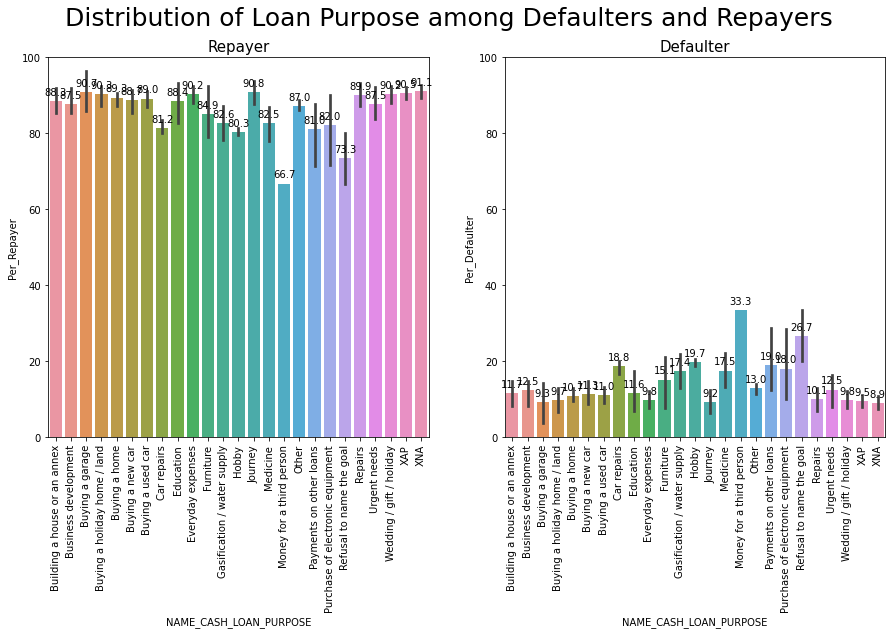

In [136]:
# Distribution of Loan Purpose among Defaulters and Repayers

NAME_CASH_LOAN_PURPOSE = Applicant.groupby(['NAME_CASH_LOAN_PURPOSE'])['NAME_CASH_LOAN_PURPOSE'].apply(lambda p: p.count()*100/Applicant['NAME_CLIENT_TYPE'].count())

df=Applicant.groupby(['NAME_CASH_LOAN_PURPOSE',"NAME_CONTRACT_STATUS","TARGET"])['NAME_CASH_LOAN_PURPOSE'].apply(lambda p: p.count())
df = df.unstack().reset_index()
df["Per_Defaulter"]=df["Defaulter"]*100/(df["Defaulter"]+df["Repayer"])
df["Per_Repayer"]=df["Repayer"]*100/(df["Defaulter"]+df["Repayer"])

plt.figure(figsize=(15,7))
plt.suptitle("Distribution of Loan Purpose among Defaulters and Repayers \n", fontsize= 25, fontweight = 5, color = 'Black')

plt.subplot(121)
ax0=sns.barplot(df.NAME_CASH_LOAN_PURPOSE,df["Per_Repayer"])
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Repayer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100)

plt.subplot(122)
ax1=sns.barplot(df.NAME_CASH_LOAN_PURPOSE,df["Per_Defaulter"])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.title("Defaulter", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Black'})
    plt.ylim(0,100);

- **Inference 1**: *Loan applications for third person turned out to be maximum percentage of defaulters.*

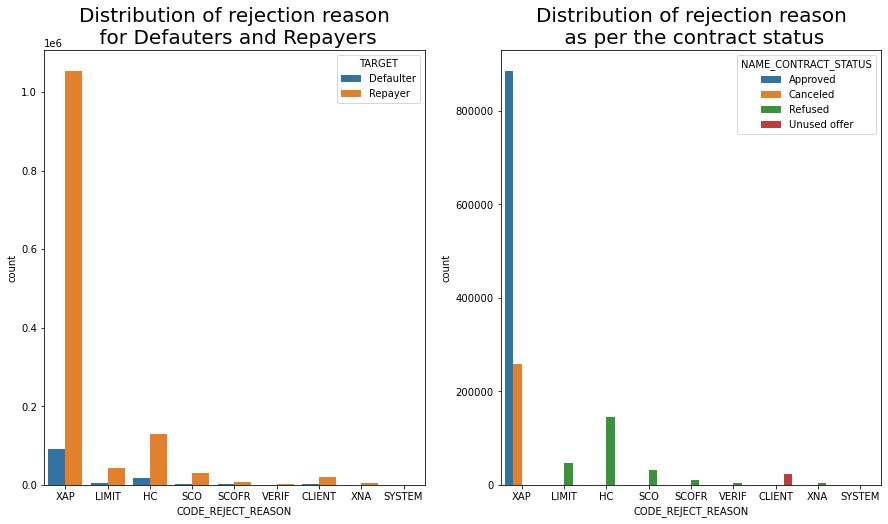

In [137]:
# Distribution of rejection reason

plt.figure(figsize=[15,8])
plt.subplot(121)
sns.countplot(x=Applicant.CODE_REJECT_REASON, hue=Applicant.TARGET)
plt.title('Distribution of rejection reason\n for Defauters and Repayers', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'});

plt.subplot(122)
sns.countplot(x=Applicant.CODE_REJECT_REASON, hue=Applicant.NAME_CONTRACT_STATUS)
plt.title('Distribution of rejection reason\n as per the contract status', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'});

plt.subplots_adjust(wspace=0.2, hspace=0.3);

- **Inference**: *Most of the rejection reason is 'XAP' which is unknown. However, it is identified that majority of 'XAP' values has their contract status as 'Approved'.*

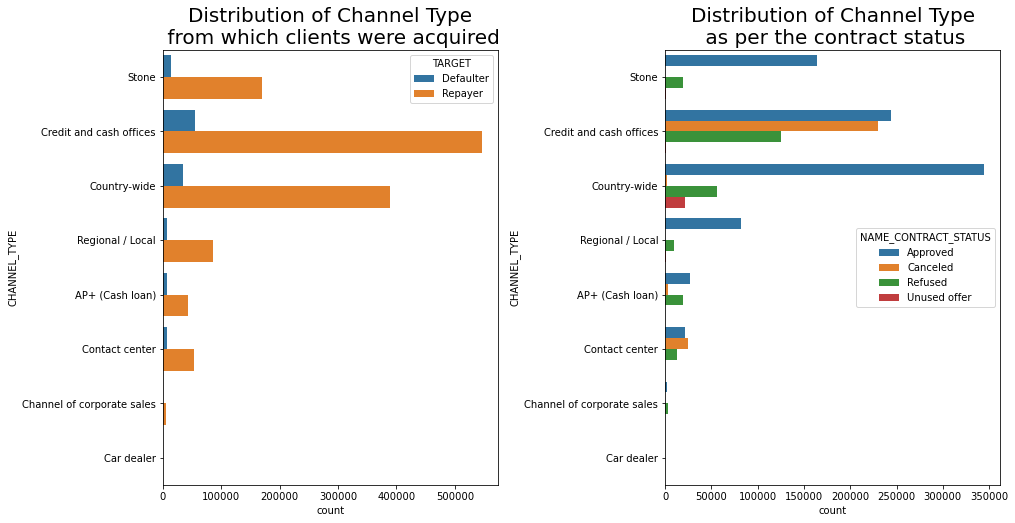

In [138]:
# Distribution of Channel Type

plt.figure(figsize=[15,8])
plt.subplot(121)
sns.countplot(y=Applicant.CHANNEL_TYPE, hue=Applicant.TARGET)
plt.title('Distribution of Channel Type\n from which clients were acquired', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'});

plt.subplot(122)
sns.countplot(y=Applicant.CHANNEL_TYPE, hue=Applicant.NAME_CONTRACT_STATUS)
plt.title('Distribution of Channel Type\n as per the contract status', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'});

plt.subplots_adjust(wspace=0.5, hspace=0.3);

- **Inference 1**: *Most of the current repayers are from Credit and Cash Offices. But majority of previous applications which were cancelled or refused were from Credit and Cash Offices.*
- **Inference 2**: *Although there are more current repayers than defaulters in Regional/Local, no previous applications were approved from this channel type.*
- **Inference 3**: *The approval rate from country wide channel was high among previous applications. Hence these applications can be trusted for sanctioning a loan.*

In [139]:
# Dividing merged dataset on basis of TARGET variable for making correlation.

Applicant_d = Applicant[Applicant["TARGET"]=="Defaulter"]
Applicant_r = Applicant[Applicant["TARGET"]=="Repayer"]

### PAIR PLOT for Defaulters

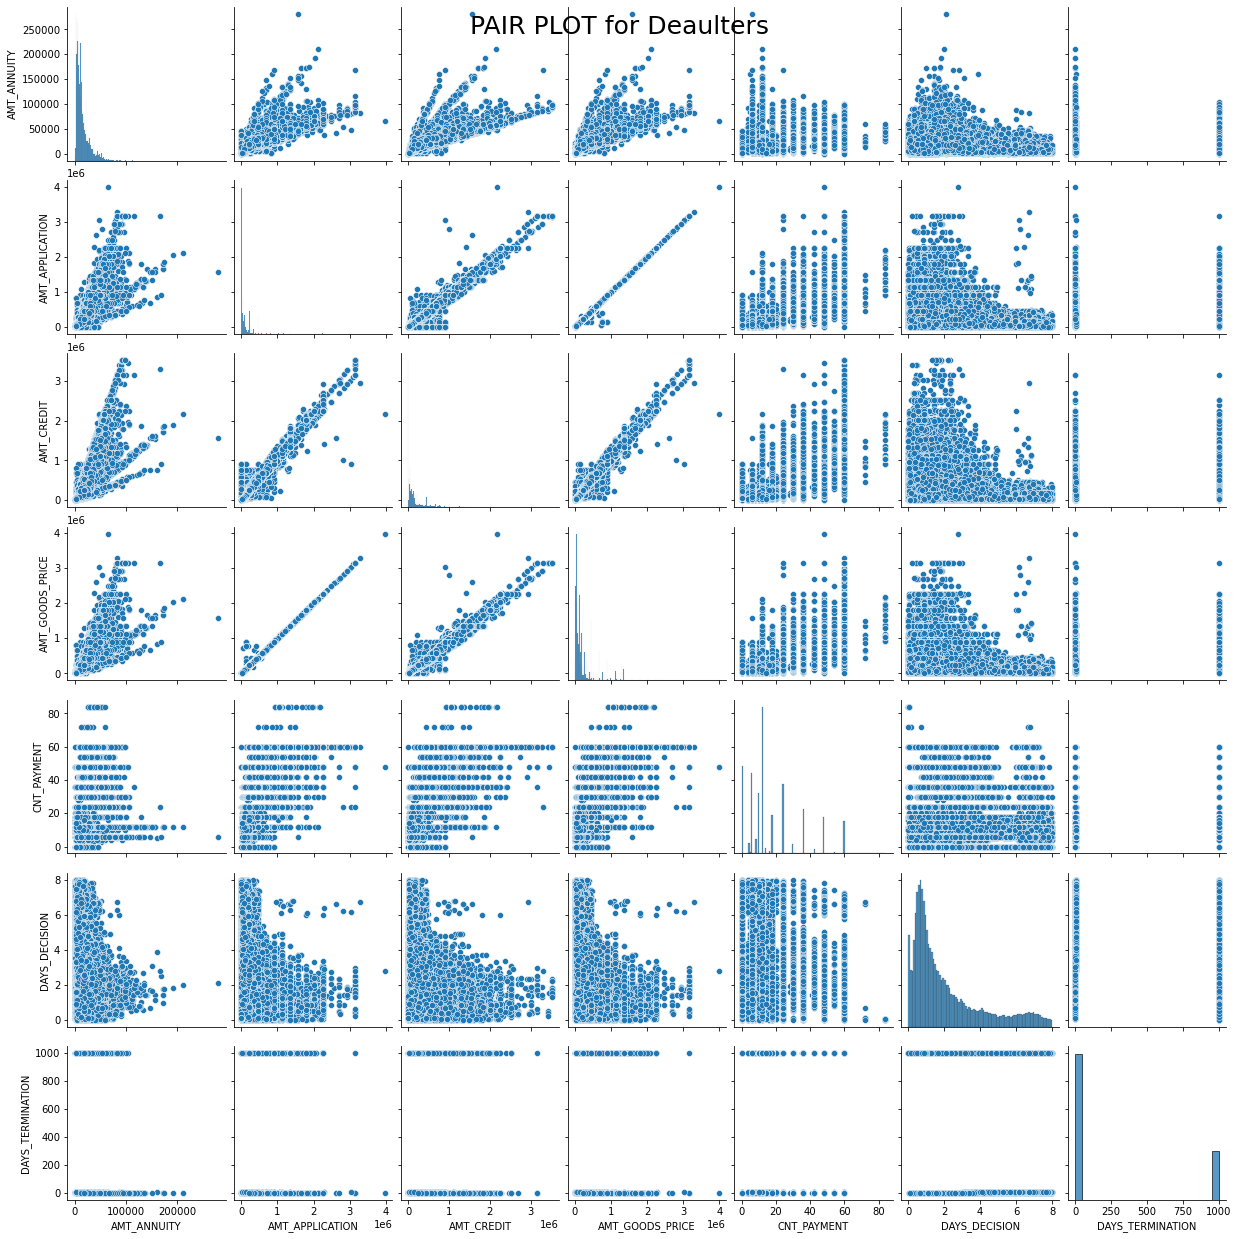

In [142]:
sns.pairplot(Applicant_d[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_DECISION', 'DAYS_TERMINATION']])
plt.suptitle("PAIR PLOT for Deaulters\n", fontsize= 25, fontweight = 5, color = 'Black')
plt.show()

### PAIR PLOT for Repayers

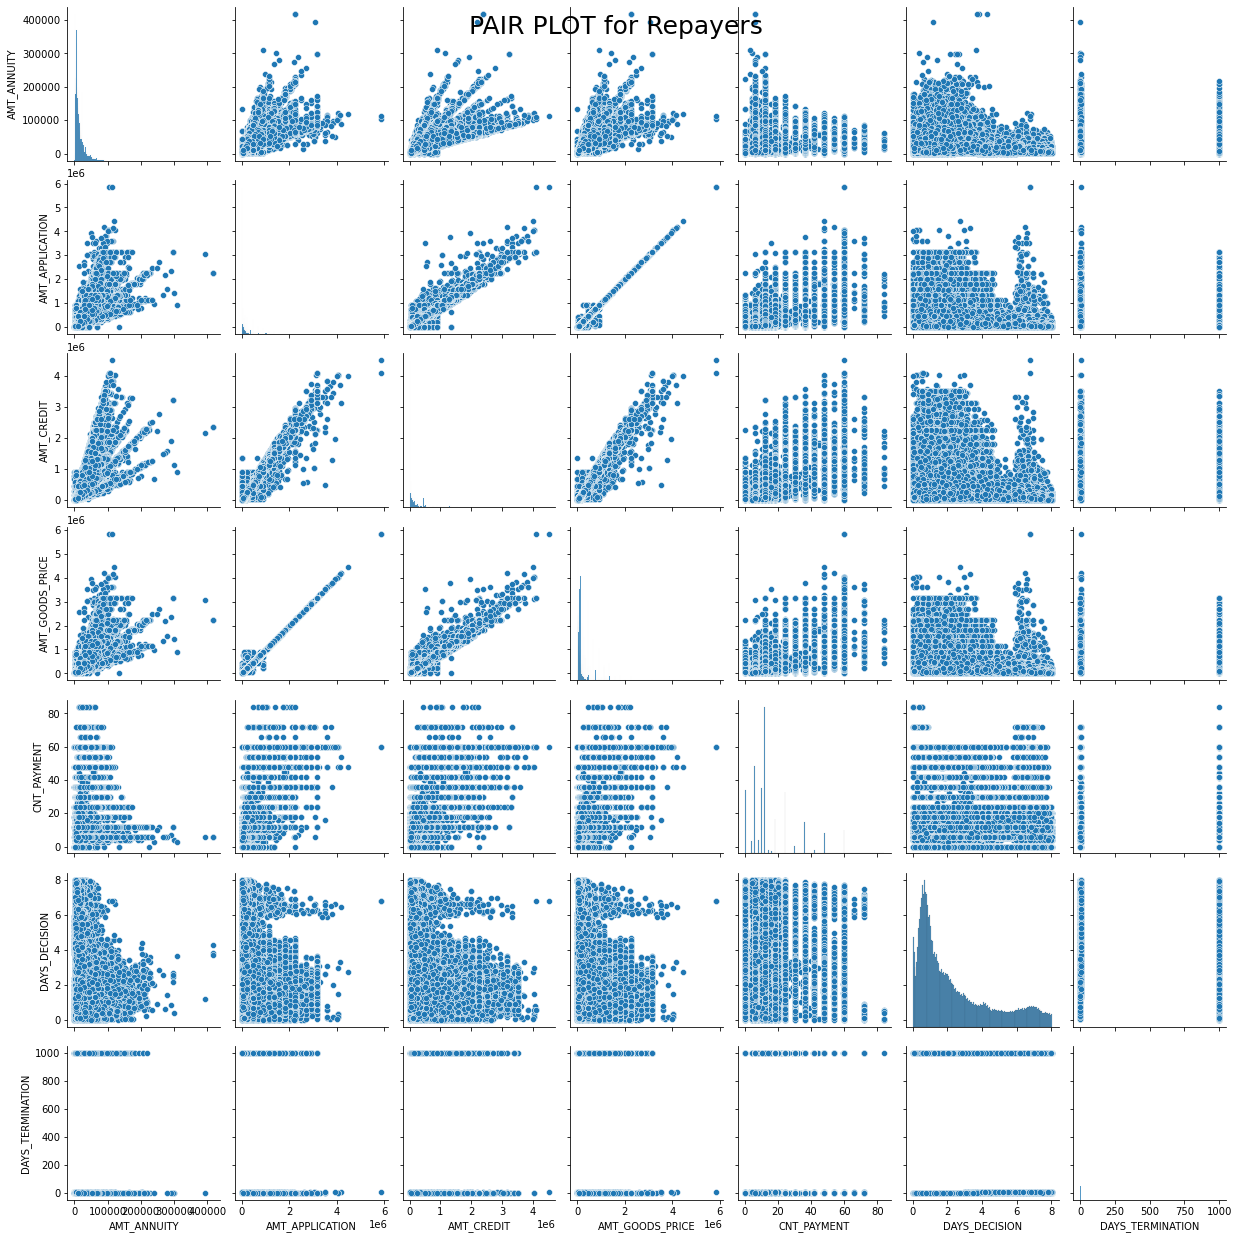

In [143]:
sns.pairplot(Applicant_r[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_DECISION', 'DAYS_TERMINATION']])
plt.suptitle("PAIR PLOT for Repayers \n", fontsize= 25, fontweight = 5, color = 'Black')
plt.show()

## Correlation for Defaulters

In [144]:
# Draw a correlation matrix for the continous variables in the data set.

corr_mat1 = Applicant_d[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_DECISION', 'DAYS_TERMINATION']].corr()
corr_mat1

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
AMT_ANNUITY          1.000000         0.824962    0.840461         0.840196   
AMT_APPLICATION      0.824962         1.000000    0.975377         0.999676   
AMT_CREDIT           0.840461         0.975377    1.000000         0.992302   
AMT_GOODS_PRICE      0.840196         0.999676    0.992302         1.000000   
CNT_PAYMENT          0.474856         0.696151    0.690538         0.687597   
DAYS_DECISION       -0.264154        -0.115894   -0.115711        -0.275449   
DAYS_TERMINATION     0.049689         0.135570    0.198824         0.191655   

                  CNT_PAYMENT  DAYS_DECISION  DAYS_TERMINATION  
AMT_ANNUITY          0.474856      -0.264154          0.049689  
AMT_APPLICATION      0.696151      -0.115894          0.135570  
AMT_CREDIT           0.690538      -0.115711          0.198824  
AMT_GOODS_PRICE      0.687597      -0.275449          0.191655  
CNT_PAYMENT          1.000000      -0.254577          0.022989  
DAYS_DECISION       -0.254577       1.000000         -0.407662  
DAYS_TERMINATION     0.022989      -0.407662          1.000000

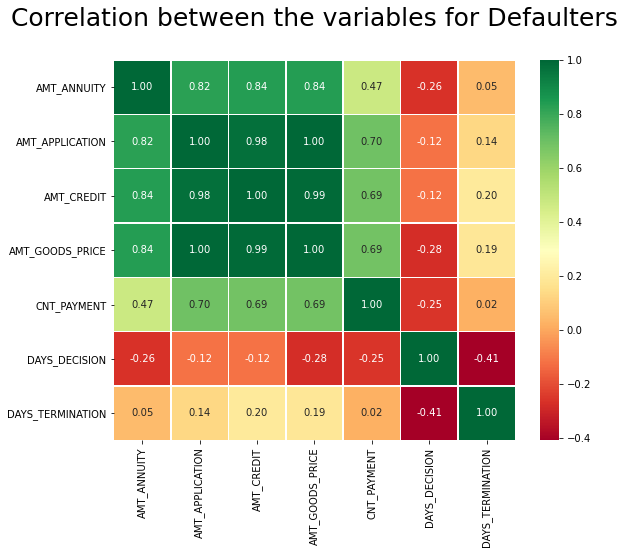

In [145]:
# Heat map representing the correlation between selective variables.

plt.figure(figsize=(9,7))
sns.heatmap(corr_mat1, annot=True,fmt='.2f',cmap="RdYlGn", linewidth=0.5)
plt.title('Correlation between the variables for Defaulters\n', fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'});

## Correlation for Repayers

In [146]:
# Draw a correlation matrix for the continous variables in the data set.

corr_mat2 = Applicant_r[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_DECISION', 'DAYS_TERMINATION']].corr()
corr_mat2

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
AMT_ANNUITY          1.000000         0.809023    0.816541         0.821027   
AMT_APPLICATION      0.809023         1.000000    0.975725         0.999888   
AMT_CREDIT           0.816541         0.975725    1.000000         0.993299   
AMT_GOODS_PRICE      0.821027         0.999888    0.993299         1.000000   
CNT_PAYMENT          0.392388         0.682531    0.674575         0.674054   
DAYS_DECISION       -0.288841        -0.143251   -0.143736        -0.297545   
DAYS_TERMINATION     0.076751         0.157457    0.224739         0.220718   

                  CNT_PAYMENT  DAYS_DECISION  DAYS_TERMINATION  
AMT_ANNUITY          0.392388      -0.288841          0.076751  
AMT_APPLICATION      0.682531      -0.143251          0.157457  
AMT_CREDIT           0.674575      -0.143736          0.224739  
AMT_GOODS_PRICE      0.674054      -0.297545          0.220718  
CNT_PAYMENT          1.000000      -0.252660          0.067182  
DAYS_DECISION       -0.252660       1.000000         -0.391392  
DAYS_TERMINATION     0.067182      -0.391392          1.000000

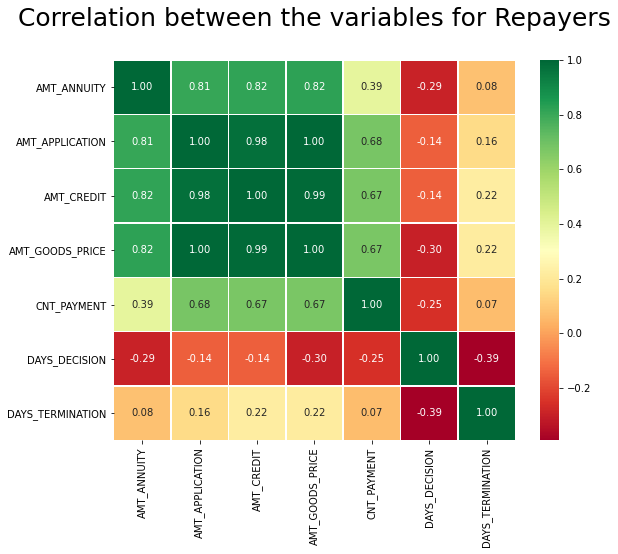

In [147]:
# Heat map representing the correlation between selective variables.

plt.figure(figsize=(9,7))
sns.heatmap(corr_mat2, annot=True,fmt='.2f',cmap="RdYlGn", linewidth=0.5)
plt.title('Correlation between the variables for Repayers\n', fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Black'});

## Top 10 Correlation for defaulter clients (with payment difficulties)

In [148]:
# list strongly to weakly correlated variables.

corrdf = corr_mat1.where(np.triu(np.ones(corr_mat1.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1             Var2  Correlation
22  AMT_GOODS_PRICE  AMT_APPLICATION         1.00
23  AMT_GOODS_PRICE       AMT_CREDIT         0.99
15       AMT_CREDIT  AMT_APPLICATION         0.98
14       AMT_CREDIT      AMT_ANNUITY         0.84
21  AMT_GOODS_PRICE      AMT_ANNUITY         0.84
7   AMT_APPLICATION      AMT_ANNUITY         0.82
29      CNT_PAYMENT  AMT_APPLICATION         0.70
30      CNT_PAYMENT       AMT_CREDIT         0.69
31      CNT_PAYMENT  AMT_GOODS_PRICE         0.69
28      CNT_PAYMENT      AMT_ANNUITY         0.47

## Top 10 Correlation for repayers clients (with no payment difficulties)

In [149]:
# list strongly to weakly correlated variables.

corrdf = corr_mat2.where(np.triu(np.ones(corr_mat2.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1             Var2  Correlation
22   AMT_GOODS_PRICE  AMT_APPLICATION         1.00
23   AMT_GOODS_PRICE       AMT_CREDIT         0.99
15        AMT_CREDIT  AMT_APPLICATION         0.98
21   AMT_GOODS_PRICE      AMT_ANNUITY         0.82
14        AMT_CREDIT      AMT_ANNUITY         0.82
7    AMT_APPLICATION      AMT_ANNUITY         0.81
29       CNT_PAYMENT  AMT_APPLICATION         0.68
31       CNT_PAYMENT  AMT_GOODS_PRICE         0.67
30       CNT_PAYMENT       AMT_CREDIT         0.67
47  DAYS_TERMINATION    DAYS_DECISION         0.39

- **Inference1**: *Among the given variables in the data set, AMT_GOODS_PRICE and AMT_APPLICATION are observed to be highly correlated.*
- **Inference 2**: *AMT_GOODS_PRICE, AMT_APPLICATION, AMT_CREDIT and AMT_ANNUITY are strongly correlated with each other.*
- **Inference 3**: *It can be observed that CNT_PAYMENT and AMT_ANNUITY are more correlated among defaulters compared to repayers.*